In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def createDict(dirPath, years, prefix):
    trny = {}
    for year in years:
        filepath = f"{dirPath}/{prefix}{year}.csv"
        trny[year] = pd.read_csv(filepath)

    return trny


def calcBaseStats(df):
    dAvg = np.mean(df["ADE"])
    dStd = np.std(df["ADE"])
    oAvg = np.mean(df["AOE"])
    oStd = np.std(df["AOE"])
    xMin = dAvg - dStd
    xMax = dAvg + dStd
    yMin = oAvg - oStd
    yMax = oAvg + oStd

    return dAvg, dStd, oAvg, oStd, xMin, xMax, yMin, yMax


def calcRndStats(df, rnd):
    dAvg, dStd, oAvg, oStd, _, _, _, _ = calcBaseStats(df)

    if rnd == 1:
        xMin = dAvg - (1.75 * dStd)
        xMax = dAvg + (0.25 * dStd)
        yMin = oAvg - (0.25 * oStd)
        yMax = oAvg + (1.75 * oStd)
    if rnd in (2, 3, 4, 5, 6):
        xMin = dAvg - (2 * dStd)
        xMax = dAvg
        yMin = oAvg
        yMax = oAvg + (2 * oStd)

    return xMin, xMax, yMin, yMax


def setPtProps(df, rnd):
    if df["finish"].isna().all() or len(df) == 0:
        color = ["c"]
        size = [100]
        alpha = [0.75]
    else:
        color = ["limegreen" if x < (8 - rnd) else "r" for x in df["finish"]]
        size = [(rnd * 15) - 10 if rnd < 3 else (rnd * 15) + 5]
        alpha = [0.75 if x < (8 - rnd) else 0.5 for x in df["finish"]]

    return color, size, alpha

def renderSingle(baseDf, rndDf, rnd, figTitle, rndTitle, ptLabels=False):
    dAvg, _, oAvg, _, xMinB, xMaxB, yMinB, yMaxB = calcBaseStats(df=baseDf)
    xMinSc, xMaxSc, yMinSc, yMaxSc = calcRndStats(df=baseDf, rnd=rnd)
    color, size, alpha = setPtProps(df=rndDf, rnd=rnd)

    fig, ax = plt.subplots(figsize=(20, 20))

    fig.suptitle(
        f"{figTitle} | {rndTitle}",
        fontsize=14,
        fontweight="bold",
    )

    ax.set_facecolor("slategray")
    ax.set_xlabel("DEF")
    ax.set_ylabel("OFF")
    ax.autoscale()

    ax.set_xlim(min(rndDf["ADE"]) - 1, max(rndDf["ADE"]) + 1)
    ax.set_ylim(min(rndDf["AOE"]) - 1, max(rndDf["AOE"]) + 1)

    ax.axvline(x=xMinSc, color="deepskyblue", linestyle=(0, (1, 2)), linewidth=0.75)
    ax.axvline(x=xMaxSc, color="deepskyblue", linestyle=(0, (1, 2)), linewidth=0.75)
    ax.axhline(y=yMinSc, color="deepskyblue", linestyle=(0, (1, 2)), linewidth=0.75)
    ax.axhline(y=yMaxSc, color="deepskyblue", linestyle=(0, (1, 2)), linewidth=0.75)
    ax.fill_between(
        x=[xMinSc, xMaxSc],
        y1=yMinSc,
        y2=yMaxSc,
        color="deepskyblue",
        alpha=0.375,
    )

    ax.axvline(x=dAvg, color="white", linestyle=(0, (5, 10)), linewidth=0.625)
    ax.axhline(y=oAvg, color="white", linestyle=(0, (5, 10)), linewidth=0.625)
    ax.fill_between(
        x=[xMinB, xMaxB],
        y1=yMinB,
        y2=yMaxB,
        color="white",
        alpha=0.375,
        linewidth=0,
    )

    ax.scatter(
        rndDf["ADE"],
        rndDf["AOE"],
        c=color,
        s=size,
        alpha=alpha,
    )

    if ptLabels:
        for _, pt in rndDf.iterrows():
            ax.text(
                pt["ADE"],
                pt["AOE"] + 0.25,
                pt["seed"],
                fontsize=8,
                fontweight="bold",
                ha="center",
                va="bottom",
                c="yellow",
            )

        for _, pt in rndDf.iterrows():
            ax.text(
                pt["ADE"] + 0.25,
                pt["AOE"] + 0.25,
                pt["teamAbv"],
                fontsize=8,
                fontweight="bold",
                ha="left",
                va="bottom",
                c="white",
            )

    return plt.show()


def renderMulti(baseDf, dataDict, cols, rows, figTitle):
    fig, axs = plt.subplots(rows, cols, figsize=(15, 15))

    fig.suptitle(
        figTitle,
        fontsize=16,
        fontweight="bold",
    )

    for ax in axs.flat:
        ax.set_facecolor("slategray")
        ax.set_xlabel("DEF")
        ax.set_ylabel("OFF")
        ax.autoscale()

    dAvg, _, oAvg, _, xMinB, xMaxB, yMinB, yMaxB = calcBaseStats(df=baseDf)

    for data in dataDict:
        rnd = data["rnd"]
        ax = data["ax"]
        df = data["df"]
        title = data["title"]
        ptLabels = data["ptLabels"]

        xMinSc, xMaxSc, yMinSc, yMaxSc = calcRndStats(df=baseDf, rnd=rnd)
        color, size, alpha = setPtProps(df=df, rnd=rnd)

        axs[ax].set_title(title)
        axs[ax].set_xlim(min(df["ADE"]) - 1, max(df["ADE"]) + 1)
        axs[ax].set_ylim(min(df["AOE"]) - 1, max(df["AOE"]) + 1)

        axs[ax].axvline(
            x=xMinSc, color="deepskyblue", linestyle=(0, (1, 2)), linewidth=0.75
        )
        axs[ax].axvline(
            x=xMaxSc, color="deepskyblue", linestyle=(0, (1, 2)), linewidth=0.75
        )
        axs[ax].axhline(
            y=yMinSc, color="deepskyblue", linestyle=(0, (1, 2)), linewidth=0.75
        )
        axs[ax].axhline(
            y=yMaxSc, color="deepskyblue", linestyle=(0, (1, 2)), linewidth=0.75
        )
        axs[ax].fill_between(
            x=[xMinSc, xMaxSc],
            y1=yMinSc,
            y2=yMaxSc,
            color="deepskyblue",
            alpha=0.375,
        )

        axs[ax].axvline(x=dAvg, color="white", linestyle=(0, (5, 10)), linewidth=0.625)
        axs[ax].axhline(y=oAvg, color="white", linestyle=(0, (5, 10)), linewidth=0.625)
        axs[ax].fill_between(
            x=[xMinB, xMaxB],
            y1=yMinB,
            y2=yMaxB,
            color="white",
            alpha=0.375,
            linewidth=0,
        )

        axs[ax].scatter(
            df["ADE"],
            df["AOE"],
            c=color,
            s=size,
            alpha=alpha,
        )

        if ptLabels:
            rndAx = ax
            for _, pt in df.iterrows():
                axs[rndAx].text(
                    pt["ADE"],
                    pt["AOE"] + 0.25,
                    pt["seed"],
                    fontsize=8,
                    fontweight="bold",
                    ha="center",
                    va="bottom",
                    c="yellow",
                )

            for _, pt in df.iterrows():
                axs[rndAx].text(
                    pt["ADE"] + 0.25,
                    pt["AOE"] + 0.25,
                    pt["teamAbv"],
                    fontsize=8,
                    fontweight="bold",
                    ha="left",
                    va="bottom",
                    c="white",
                )

    fig.tight_layout(pad=1.0)

    return plt.show()

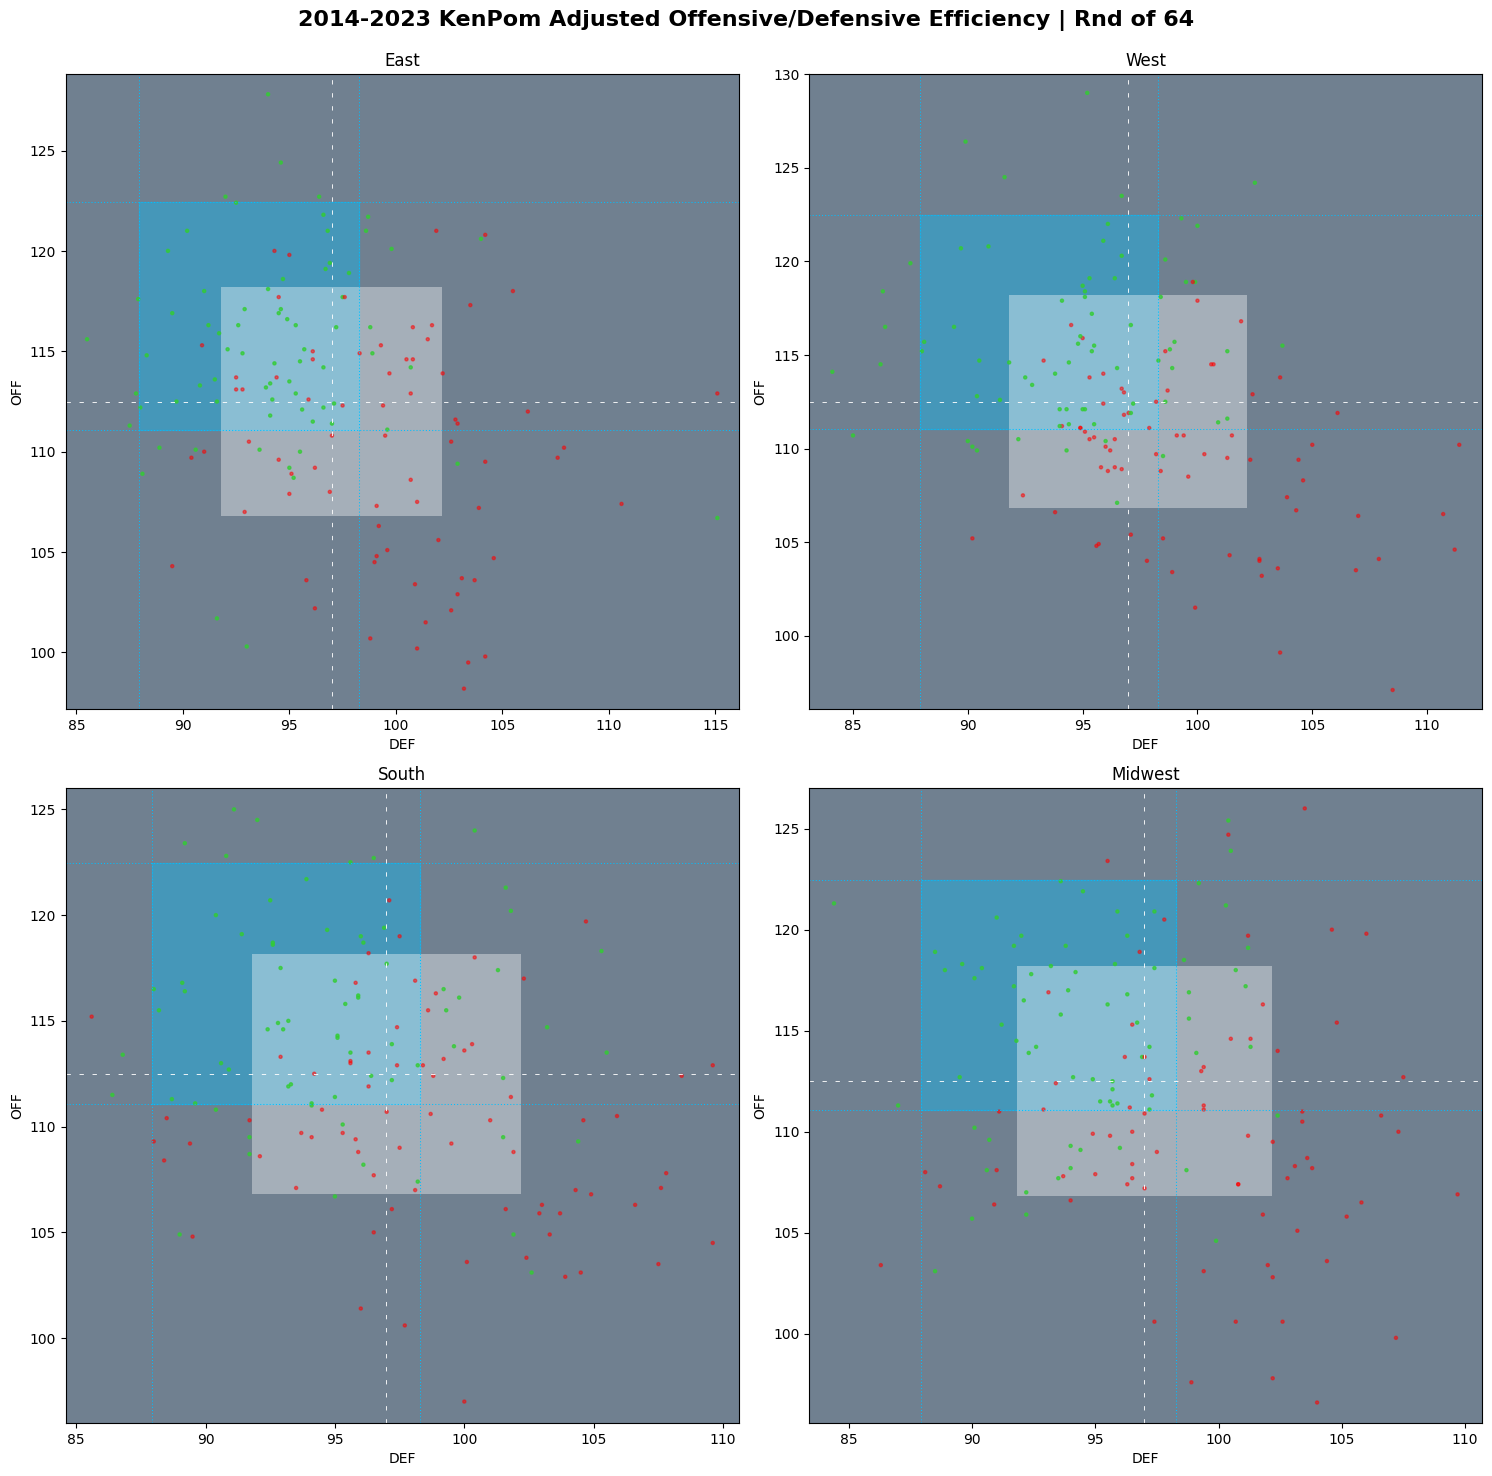

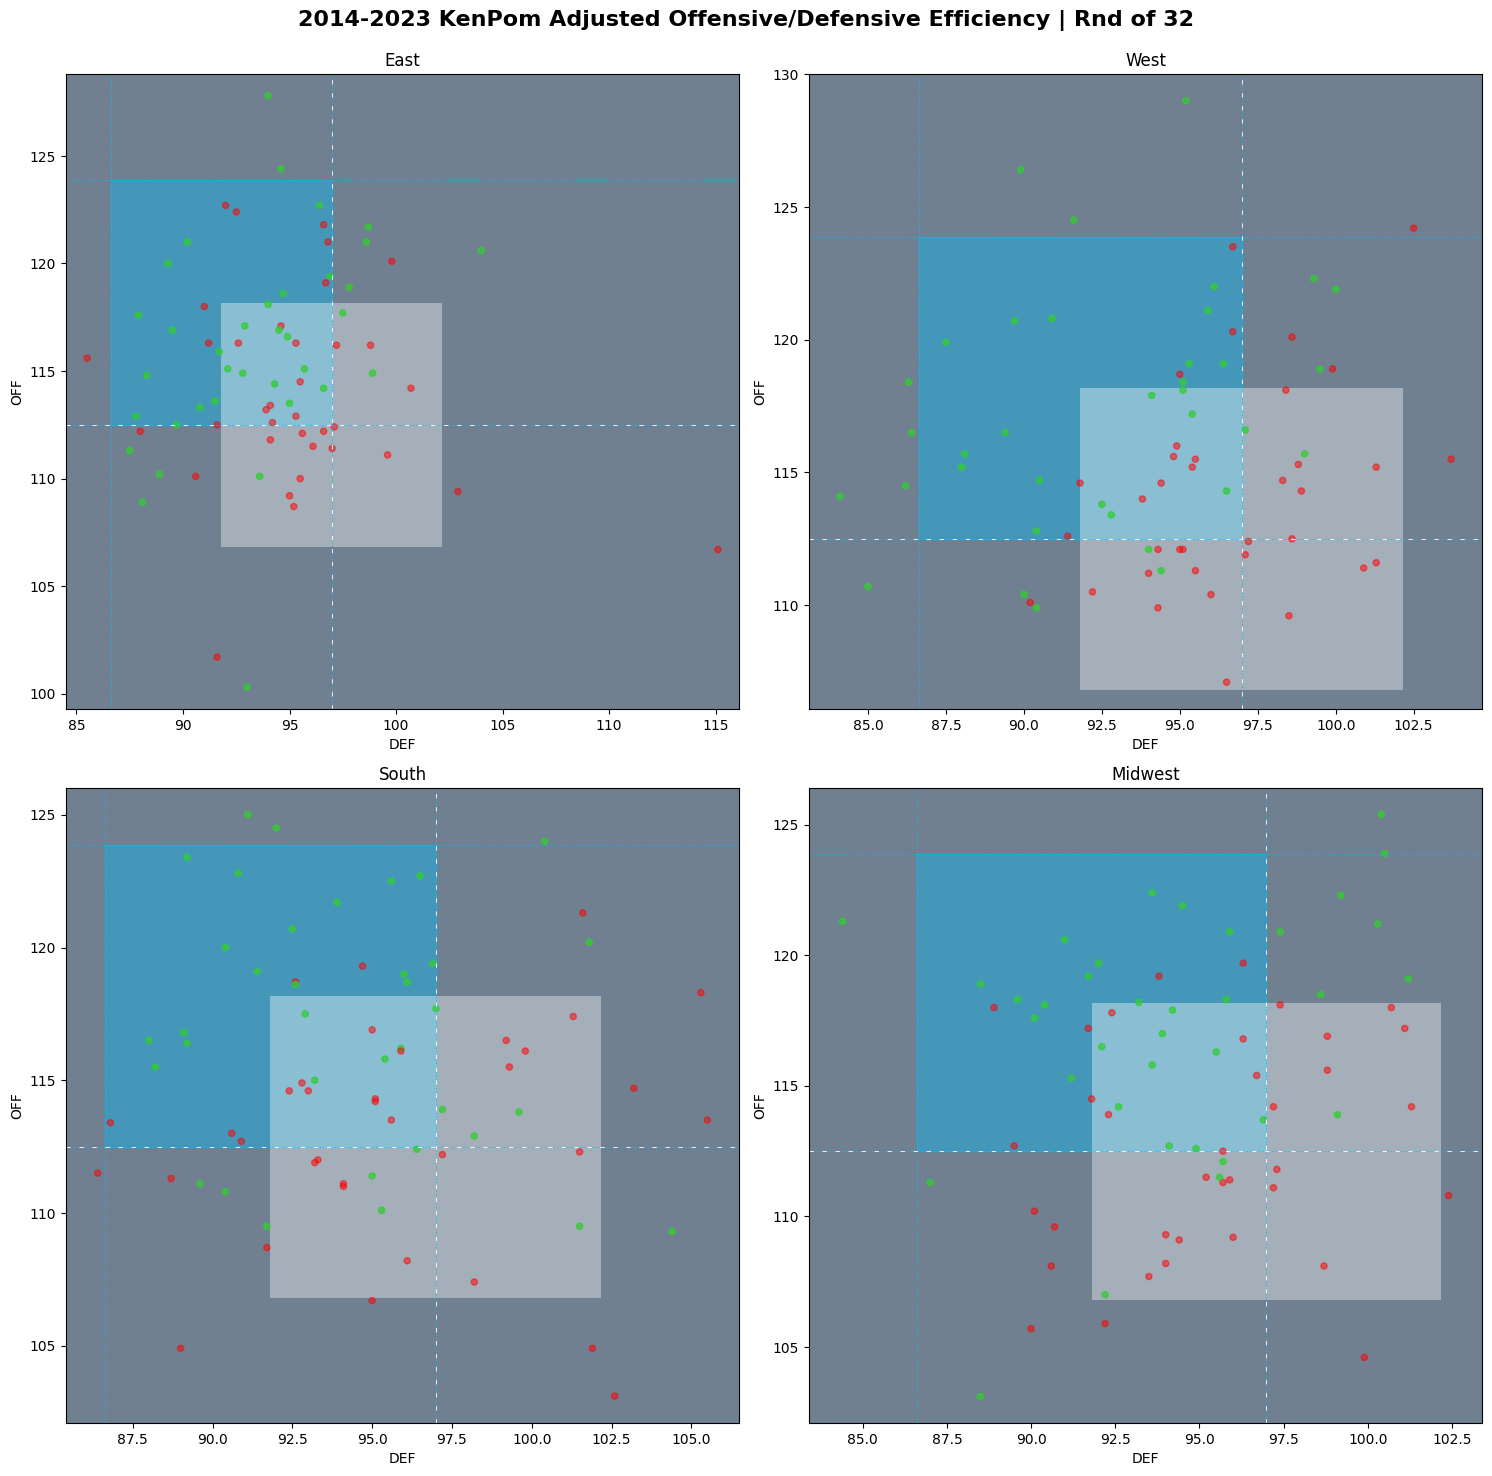

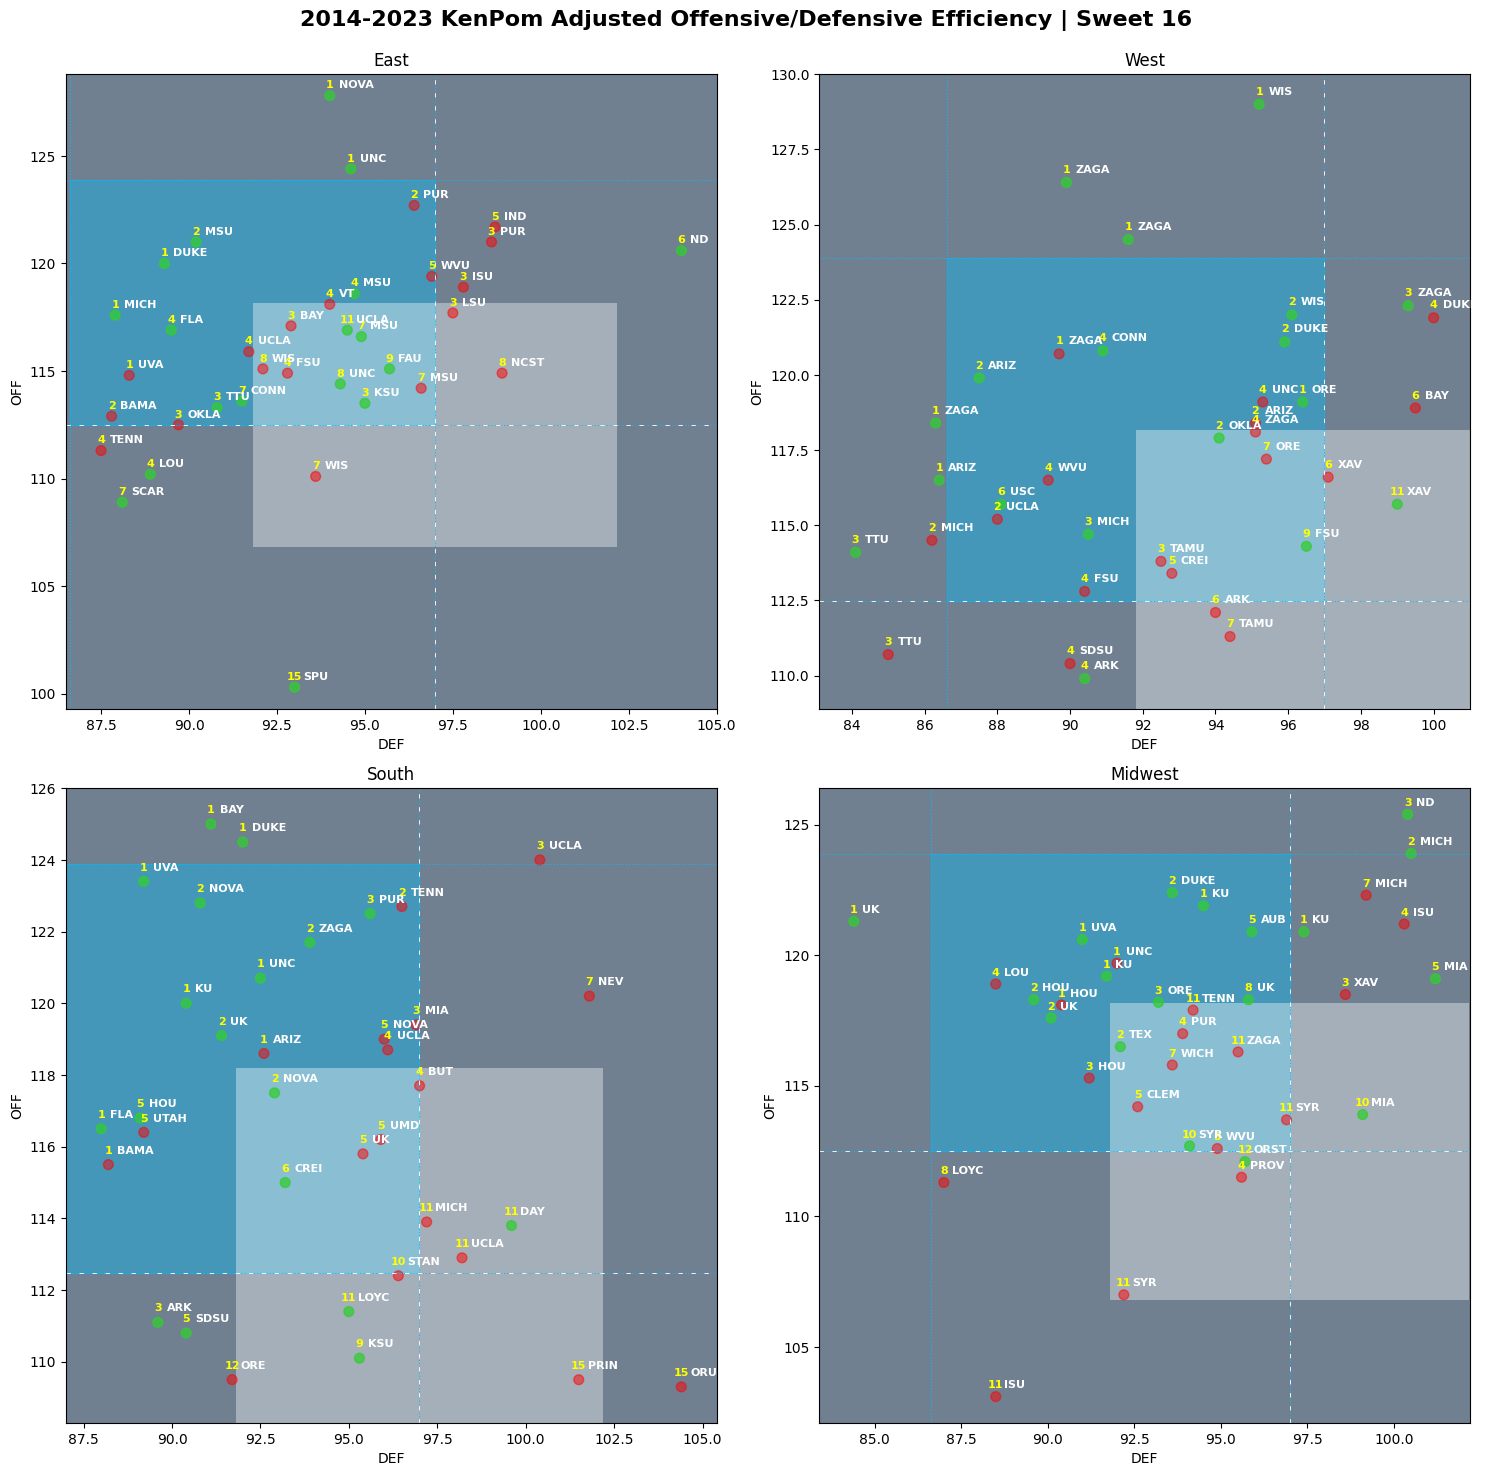

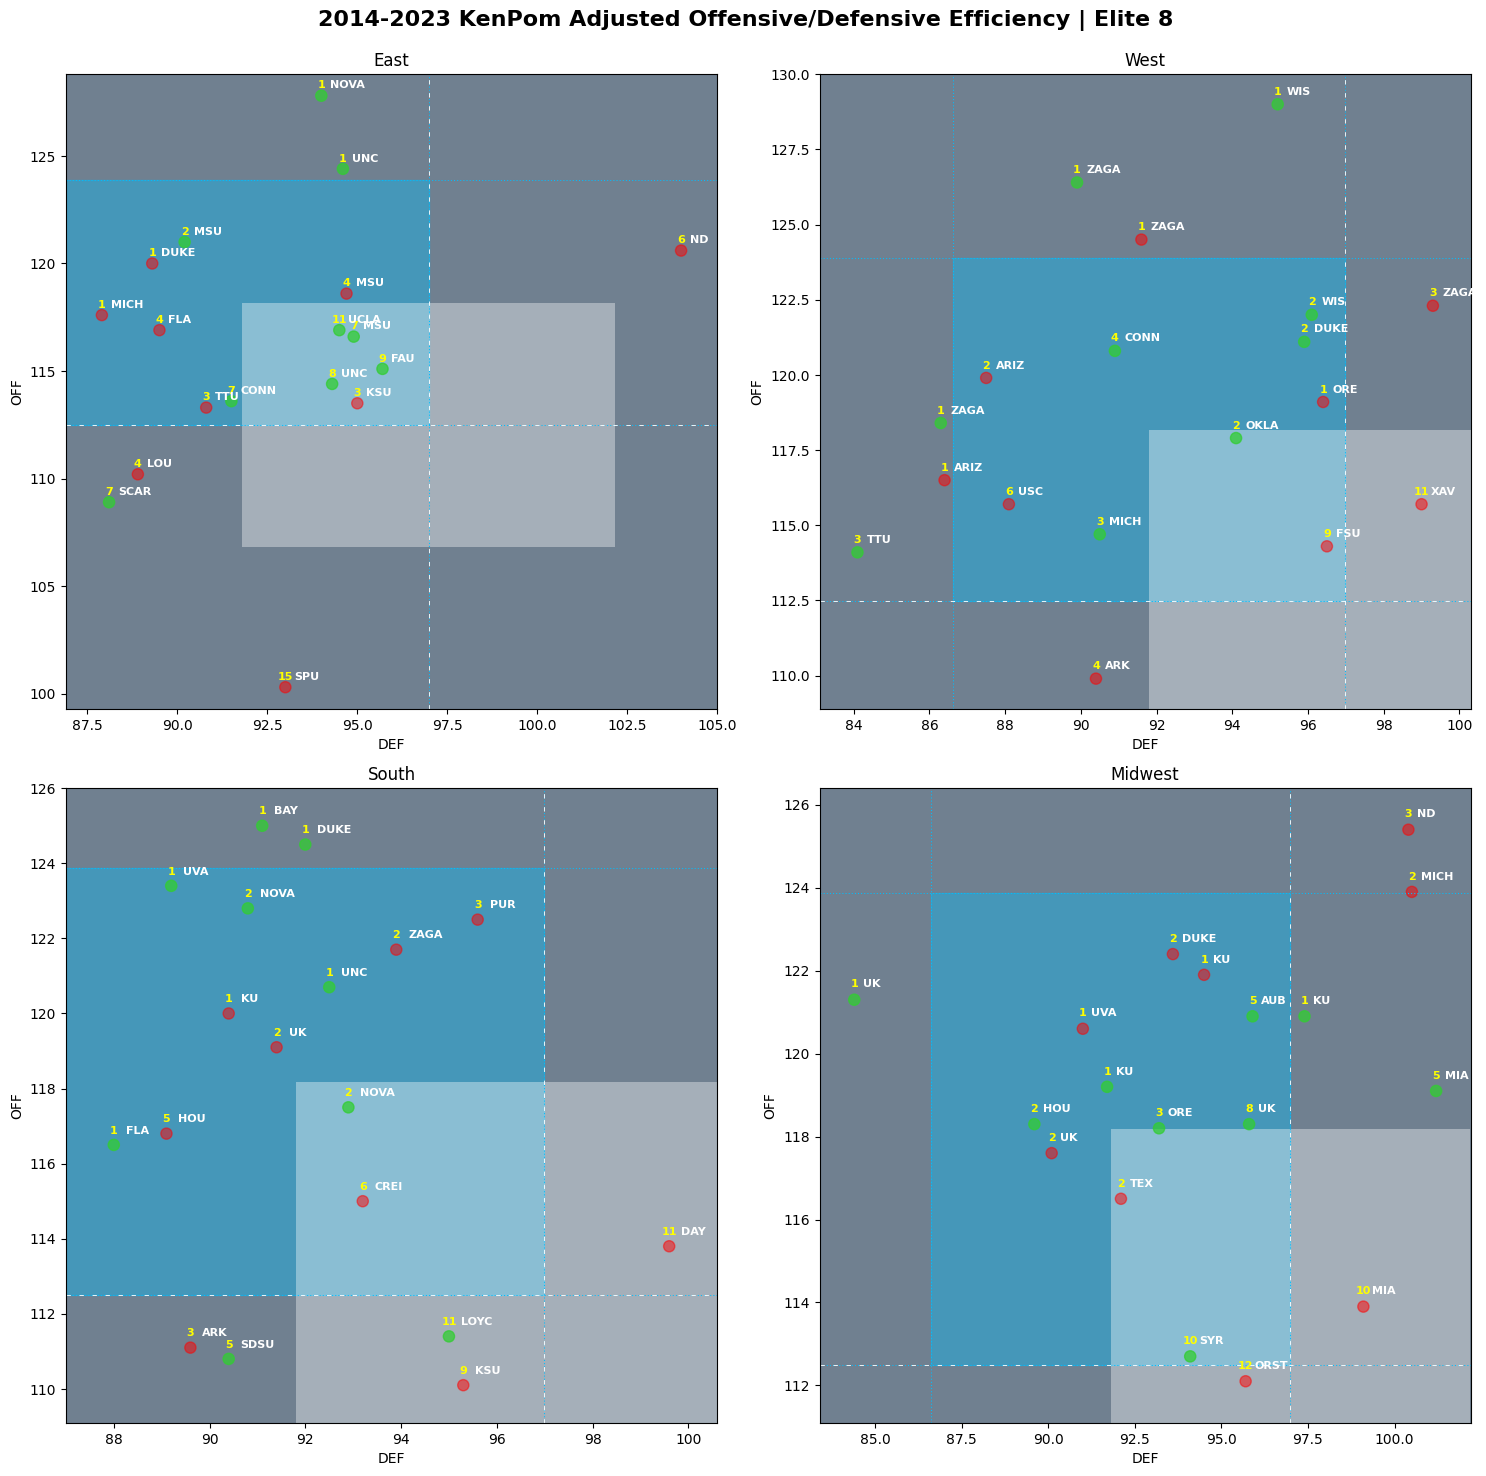

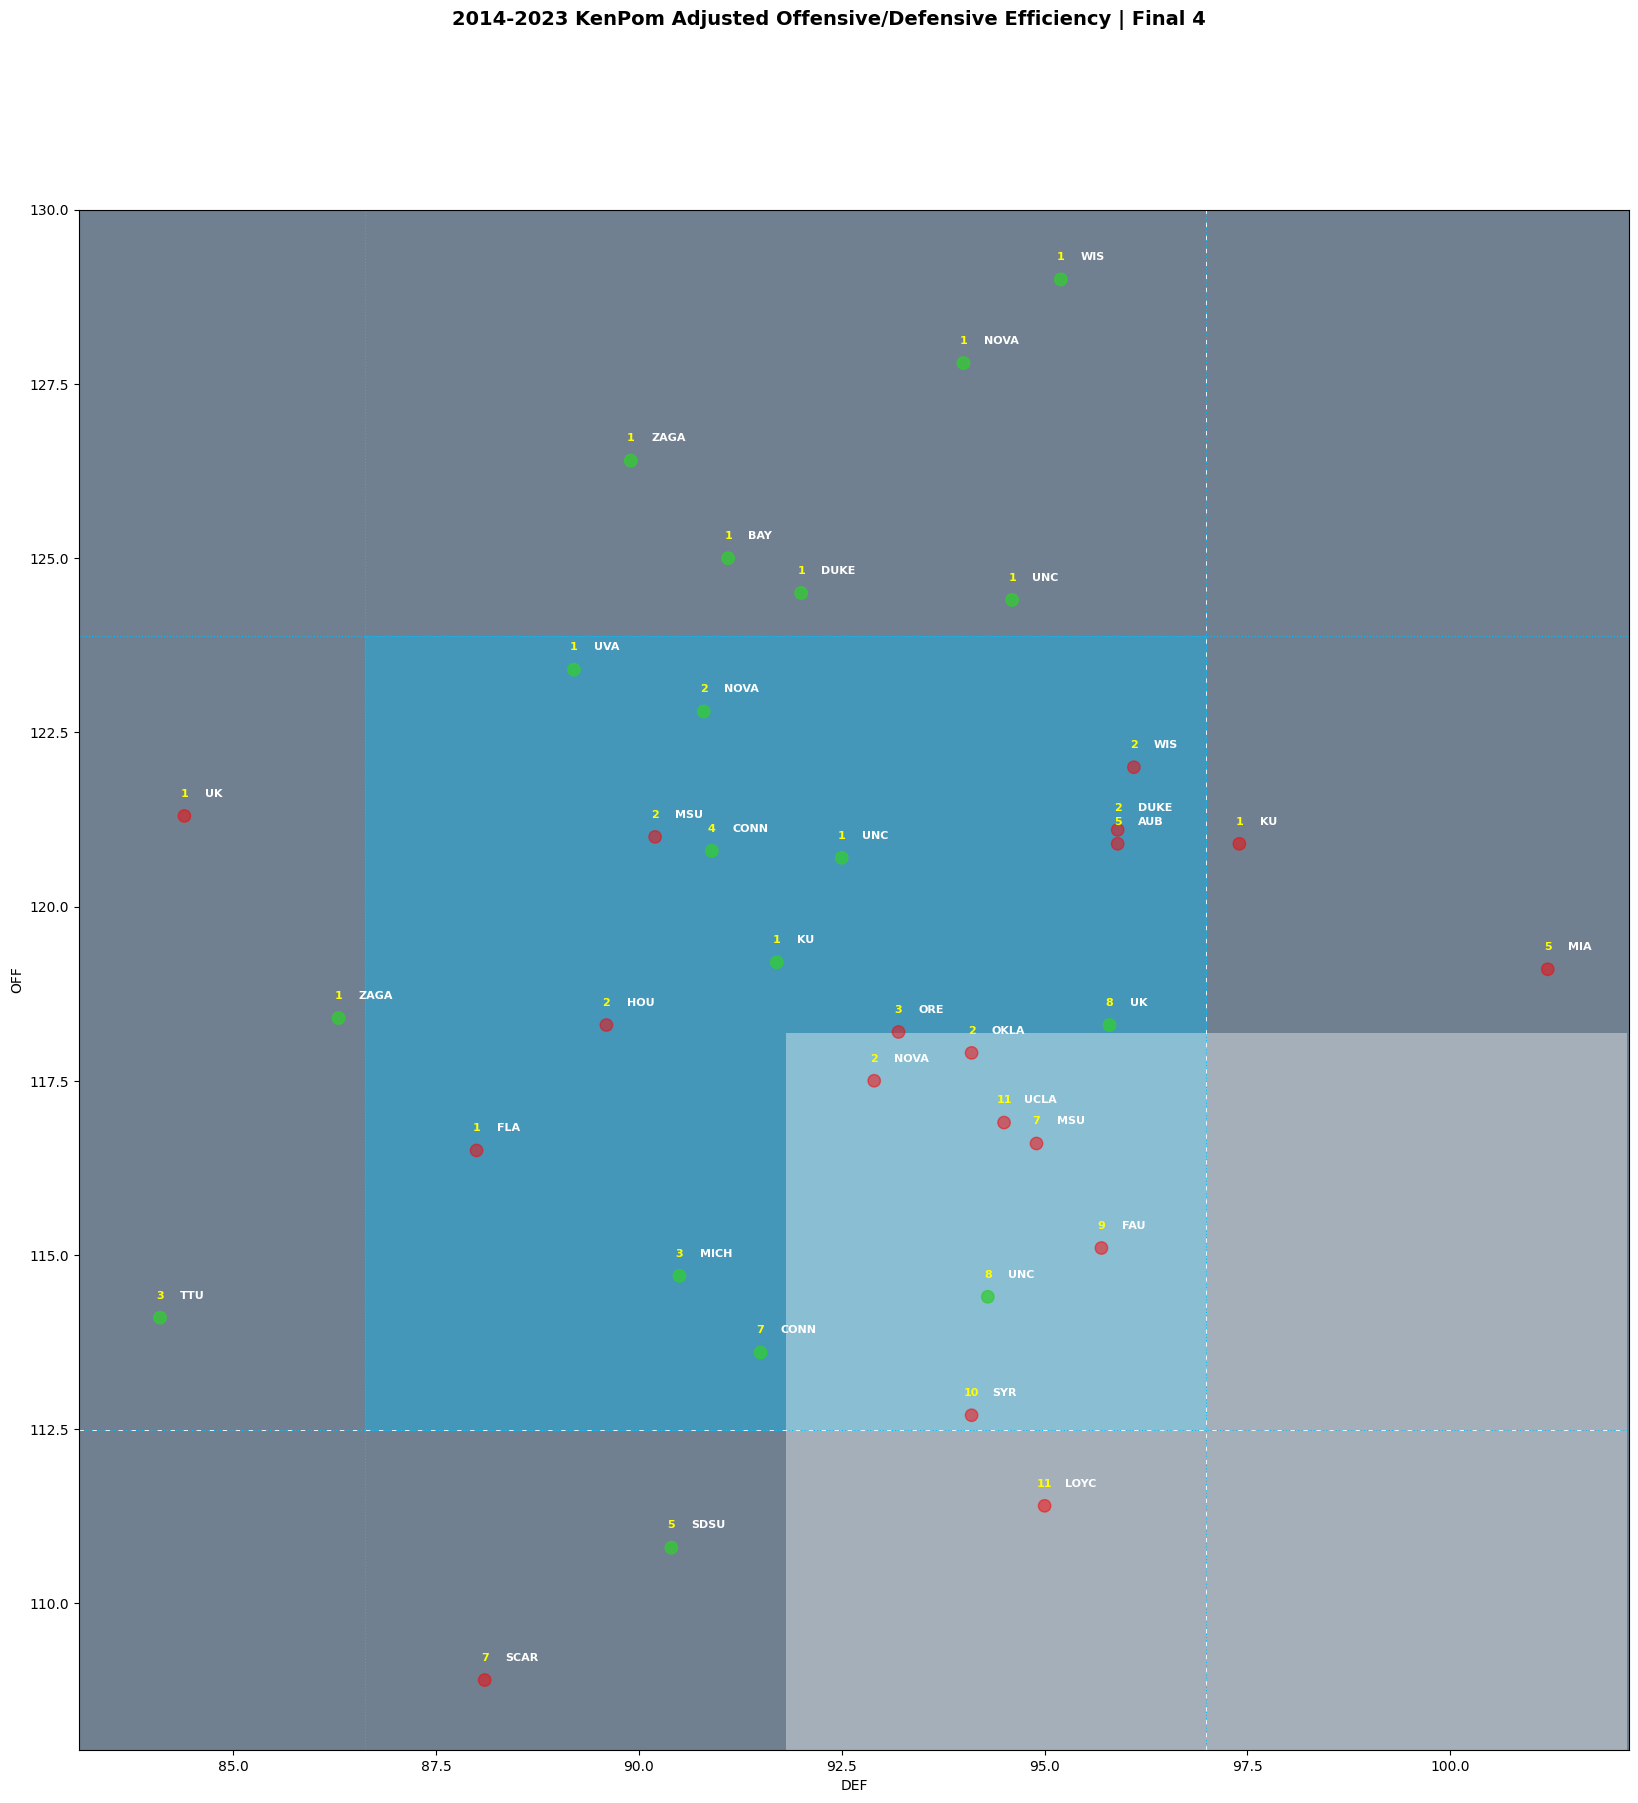

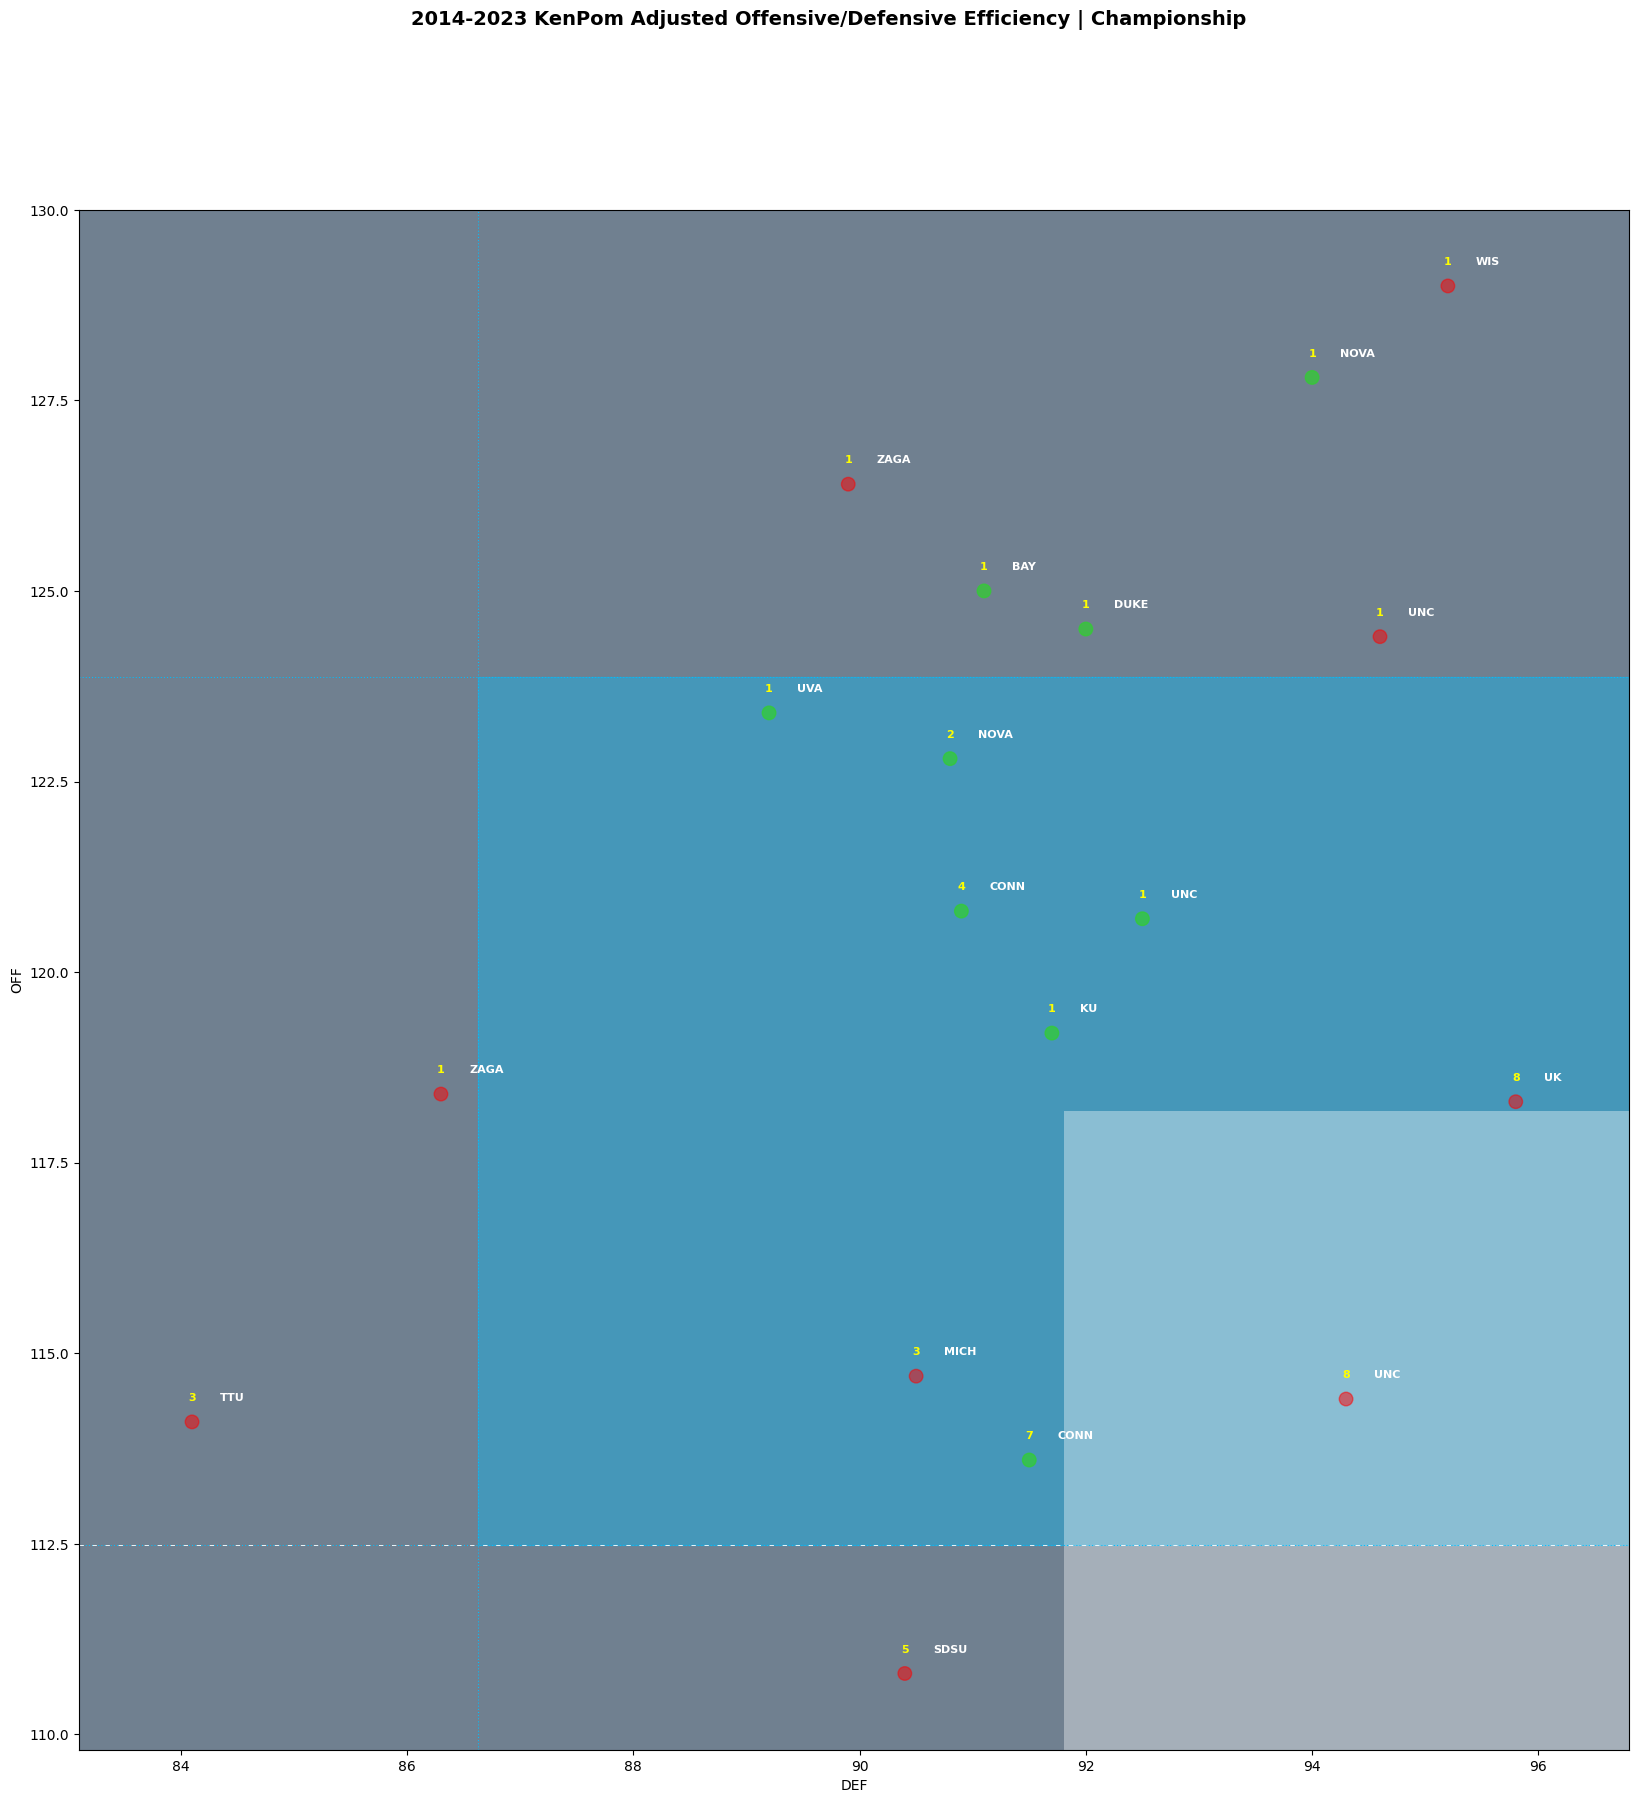

In [16]:
trnyKp = createDict(
    dirPath="../data/TourneyTeams/KenpomStats",
    years=["14", "15", "16", "17", "18", "19", "21", "22", "23"],
    prefix="trnyKenpom",
)


for year, df in trnyKp.items():
    globals()[f"trny{year}"] = df


histKpRnd1 = pd.concat(
    [trny14, trny15, trny16, trny17, trny18, trny19, trny21, trny22, trny23]
)

histKpRnd2 = pd.concat(
    [
        trny14[trny14["finish"] <= 6],
        trny15[trny15["finish"] <= 6],
        trny16[trny16["finish"] <= 6],
        trny17[trny17["finish"] <= 6],
        trny18[trny18["finish"] <= 6],
        trny19[trny19["finish"] <= 6],
        trny21[trny21["finish"] <= 6],
        trny22[trny22["finish"] <= 6],
        trny23[trny23["finish"] <= 6],
    ]
)

histKpRnd3 = pd.concat(
    [
        trny14[trny14["finish"] <= 5],
        trny15[trny15["finish"] <= 5],
        trny16[trny16["finish"] <= 5],
        trny17[trny17["finish"] <= 5],
        trny18[trny18["finish"] <= 5],
        trny19[trny19["finish"] <= 5],
        trny21[trny21["finish"] <= 5],
        trny22[trny22["finish"] <= 5],
        trny23[trny23["finish"] <= 5],
    ]
)

histKpRnd4 = pd.concat(
    [
        trny14[trny14["finish"] <= 4],
        trny15[trny15["finish"] <= 4],
        trny16[trny16["finish"] <= 4],
        trny17[trny17["finish"] <= 4],
        trny18[trny18["finish"] <= 4],
        trny19[trny19["finish"] <= 4],
        trny21[trny21["finish"] <= 4],
        trny22[trny22["finish"] <= 4],
        trny23[trny23["finish"] <= 4],
    ]
)

histKpRnd5 = pd.concat(
    [
        trny14[trny14["finish"] <= 3],
        trny15[trny15["finish"] <= 3],
        trny16[trny16["finish"] <= 3],
        trny17[trny17["finish"] <= 3],
        trny18[trny18["finish"] <= 3],
        trny19[trny19["finish"] <= 3],
        trny21[trny21["finish"] <= 3],
        trny22[trny22["finish"] <= 3],
        trny23[trny23["finish"] <= 3],
    ]
)

histKpRnd6 = pd.concat(
    [
        trny14[trny14["finish"] <= 2],
        trny15[trny15["finish"] <= 2],
        trny16[trny16["finish"] <= 2],
        trny17[trny17["finish"] <= 2],
        trny18[trny18["finish"] <= 2],
        trny19[trny19["finish"] <= 2],
        trny21[trny21["finish"] <= 2],
        trny22[trny22["finish"] <= 2],
        trny23[trny23["finish"] <= 2],
    ]
)


histRegRnd1 = histKpRnd1["hostReg"]
histRegRnd2 = histKpRnd2["hostReg"]
histRegRnd3 = histKpRnd3["hostReg"]
histRegRnd4 = histKpRnd4["hostReg"]

histKpRnd1East = histKpRnd1[histRegRnd1 == "East"]
histKpRnd1West = histKpRnd1[histRegRnd1 == "West"]
histKpRnd1South = histKpRnd1[histRegRnd1 == "South"]
histKpRnd1Midwest = histKpRnd1[histRegRnd1 == "Midwest"]

histKpRnd2East = histKpRnd2[histRegRnd2 == "East"]
histKpRnd2West = histKpRnd2[histRegRnd2 == "West"]
histKpRnd2South = histKpRnd2[histRegRnd2 == "South"]
histKpRnd2Midwest = histKpRnd2[histRegRnd2 == "Midwest"]

histKpRnd3East = histKpRnd3[histRegRnd3 == "East"]
histKpRnd3West = histKpRnd3[histRegRnd3 == "West"]
histKpRnd3South = histKpRnd3[histRegRnd3 == "South"]
histKpRnd3Midwest = histKpRnd3[histRegRnd3 == "Midwest"]

histKpRnd4East = histKpRnd4[histRegRnd4 == "East"]
histKpRnd4West = histKpRnd4[histRegRnd4 == "West"]
histKpRnd4South = histKpRnd4[histRegRnd4 == "South"]
histKpRnd4Midwest = histKpRnd4[histRegRnd4 == "Midwest"]


histKpRnd1Data = [
    {"rnd": 1, "ax": (0, 0), "df": histKpRnd1East, "title": "East", "ptLabels": False},
    {"rnd": 1, "ax": (0, 1), "df": histKpRnd1West, "title": "West", "ptLabels": False},
    {"rnd": 1, "ax": (1, 0), "df": histKpRnd1South, "title": "South", "ptLabels": False},
    {"rnd": 1, "ax": (1, 1), "df": histKpRnd1Midwest, "title": "Midwest", "ptLabels": False},
]

histKpRnd2Data = [
    {"rnd": 2, "ax": (0, 0), "df": histKpRnd2East, "title": "East", "ptLabels": False},
    {"rnd": 2, "ax": (0, 1), "df": histKpRnd2West, "title": "West", "ptLabels": False},
    {"rnd": 2, "ax": (1, 0), "df": histKpRnd2South, "title": "South", "ptLabels": False},
    {"rnd": 2, "ax": (1, 1), "df": histKpRnd2Midwest, "title": "Midwest", "ptLabels": False},
]

histKpRnd3Data = [
    {"rnd": 3, "ax": (0, 0), "df": histKpRnd3East, "title": "East", "ptLabels": True},
    {"rnd": 3, "ax": (0, 1), "df": histKpRnd3West, "title": "West", "ptLabels": True},
    {"rnd": 3, "ax": (1, 0), "df": histKpRnd3South, "title": "South", "ptLabels": True},
    {"rnd": 3, "ax": (1, 1), "df": histKpRnd3Midwest, "title": "Midwest", "ptLabels": True},
]

histKpRnd4Data = [
    {"rnd": 4, "ax": (0, 0), "df": histKpRnd4East, "title": "East", "ptLabels": True},
    {"rnd": 4, "ax": (0, 1), "df": histKpRnd4West, "title": "West", "ptLabels": True},
    {"rnd": 4, "ax": (1, 0), "df": histKpRnd4South, "title": "South", "ptLabels": True},
    {"rnd": 4, "ax": (1, 1), "df": histKpRnd4Midwest, "title": "Midwest", "ptLabels": True},
]


histKpRnd1Plot = renderMulti(baseDf=histKpRnd1, dataDict=histKpRnd1Data, cols=2, rows=2, figTitle="2014-2023 KenPom Adjusted Offensive/Defensive Efficiency | Rnd of 64\n")
histKpRnd2Plot = renderMulti(baseDf=histKpRnd1, dataDict=histKpRnd2Data, cols=2, rows=2, figTitle="2014-2023 KenPom Adjusted Offensive/Defensive Efficiency | Rnd of 32\n")
histKpRnd3Plot = renderMulti(baseDf=histKpRnd1, dataDict=histKpRnd3Data, cols=2, rows=2, figTitle="2014-2023 KenPom Adjusted Offensive/Defensive Efficiency | Sweet 16\n")
histKpRnd4Plot = renderMulti(baseDf=histKpRnd1, dataDict=histKpRnd4Data, cols=2, rows=2, figTitle="2014-2023 KenPom Adjusted Offensive/Defensive Efficiency | Elite 8\n")
histKpRnd5Plot = renderSingle(baseDf=histKpRnd1, rndDf=histKpRnd5, rnd=5, figTitle="2014-2023 KenPom Adjusted Offensive/Defensive Efficiency", rndTitle="Final 4", ptLabels=True)
histKpRnd6Plot = renderSingle(baseDf=histKpRnd1, rndDf=histKpRnd6, rnd=6, figTitle="2014-2023 KenPom Adjusted Offensive/Defensive Efficiency", rndTitle="Championship", ptLabels=True)

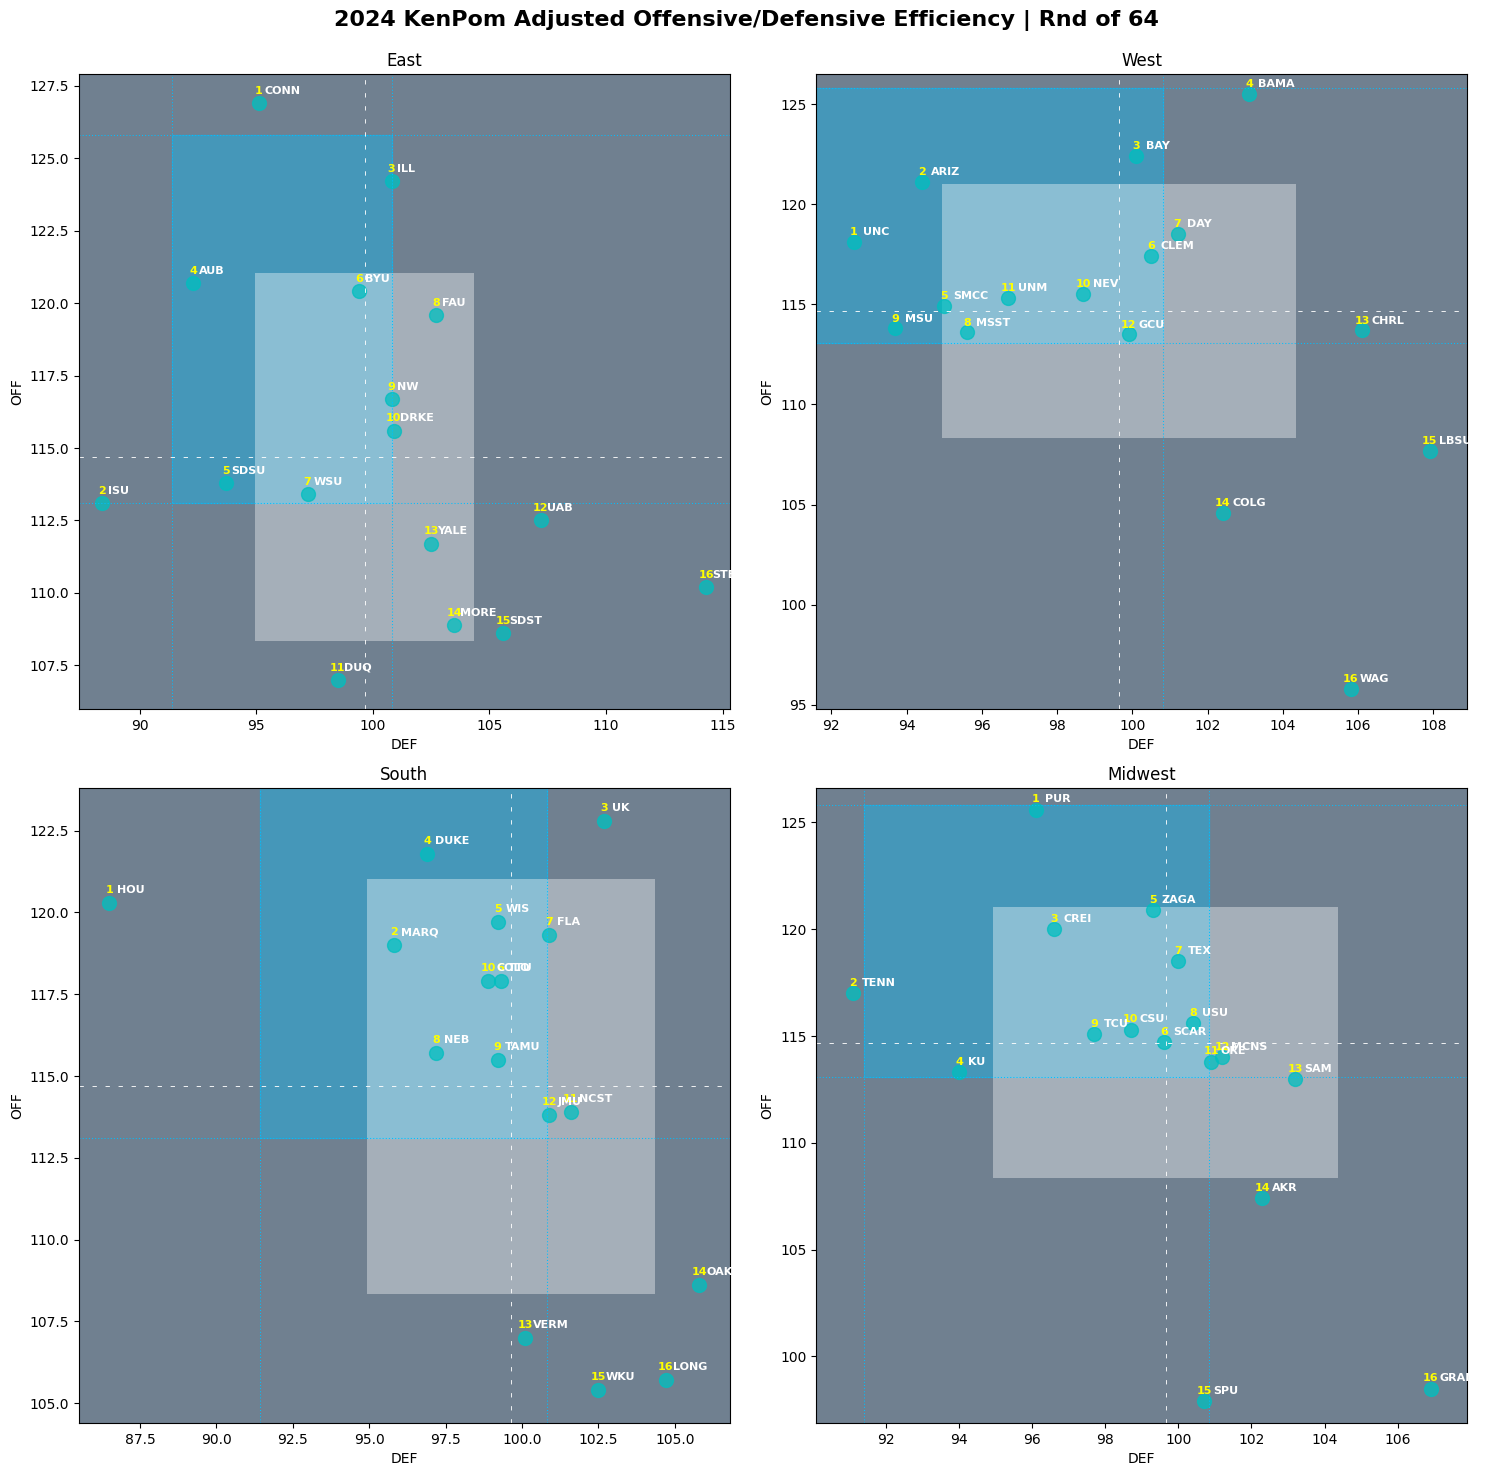

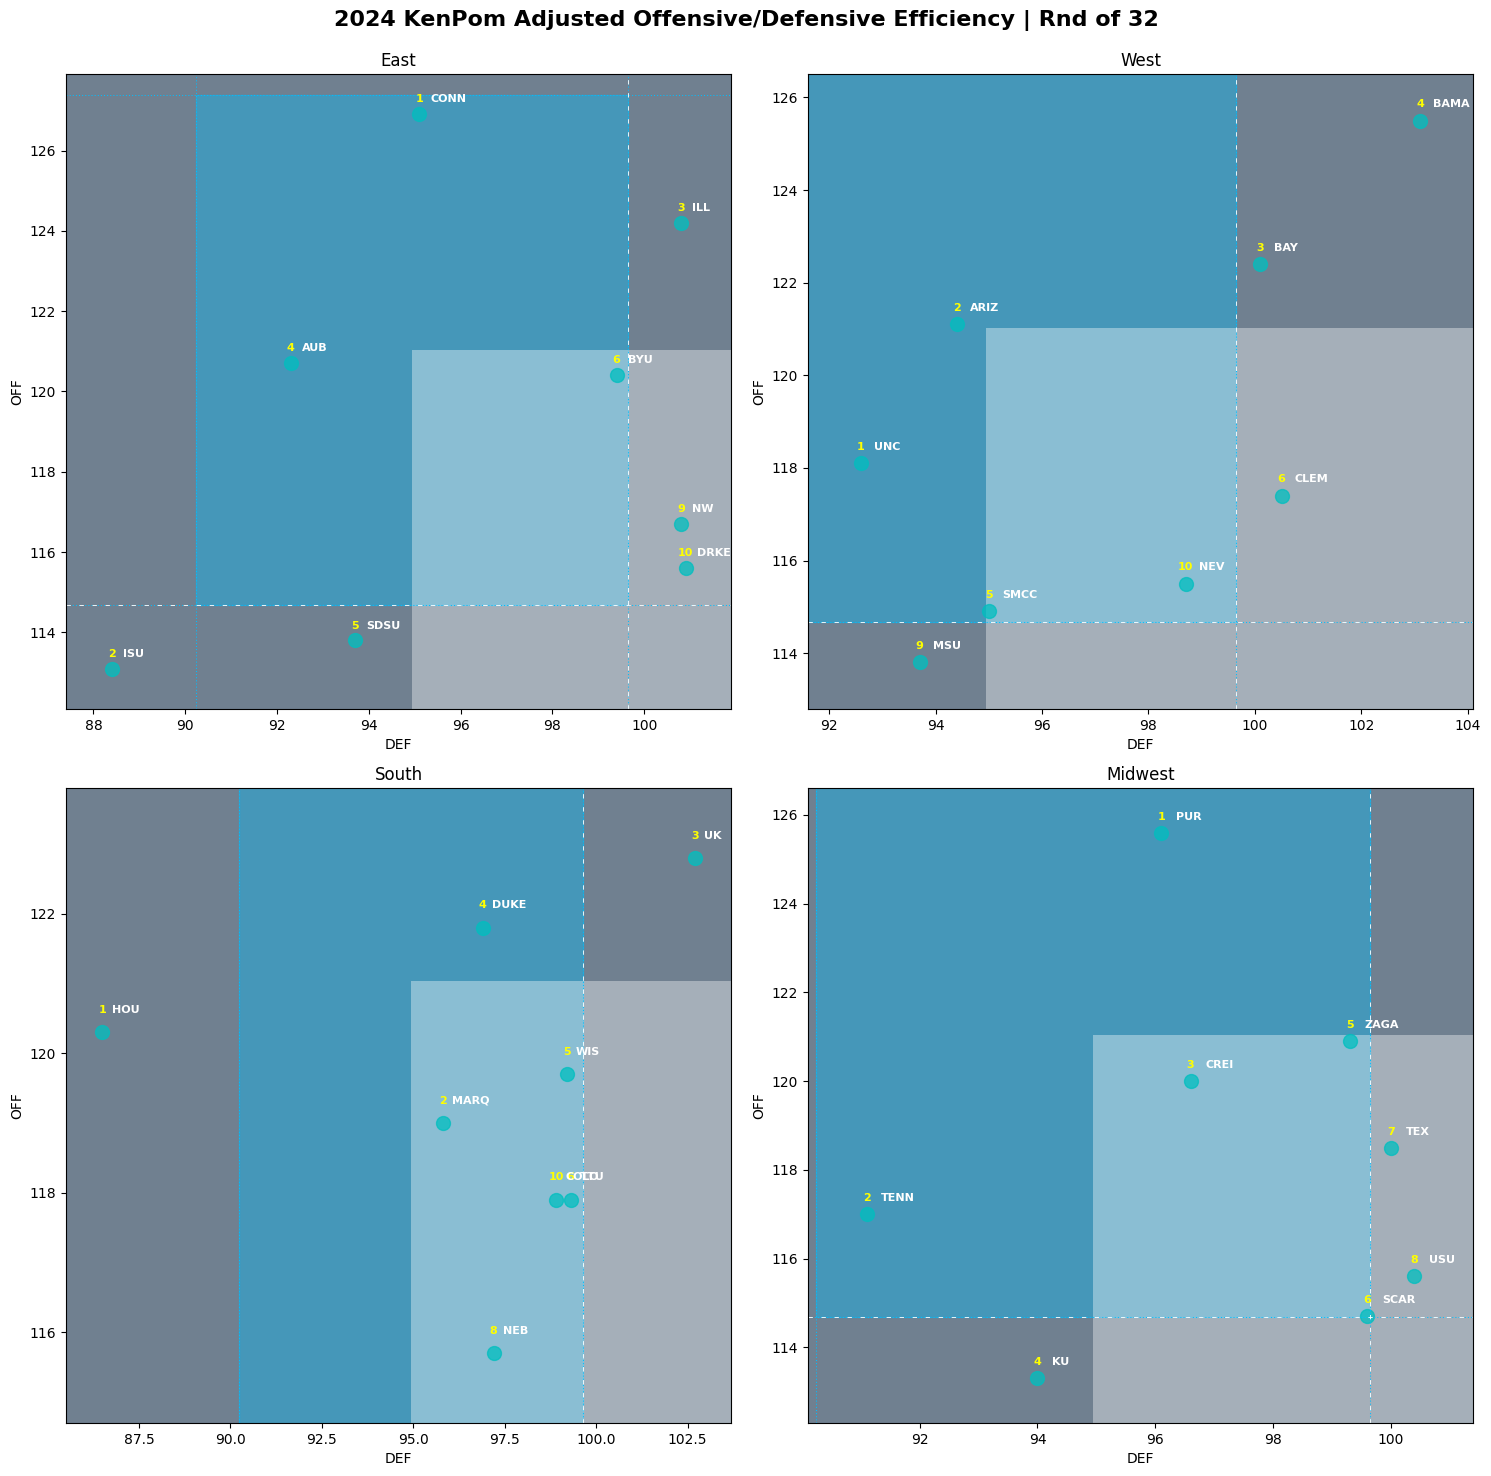

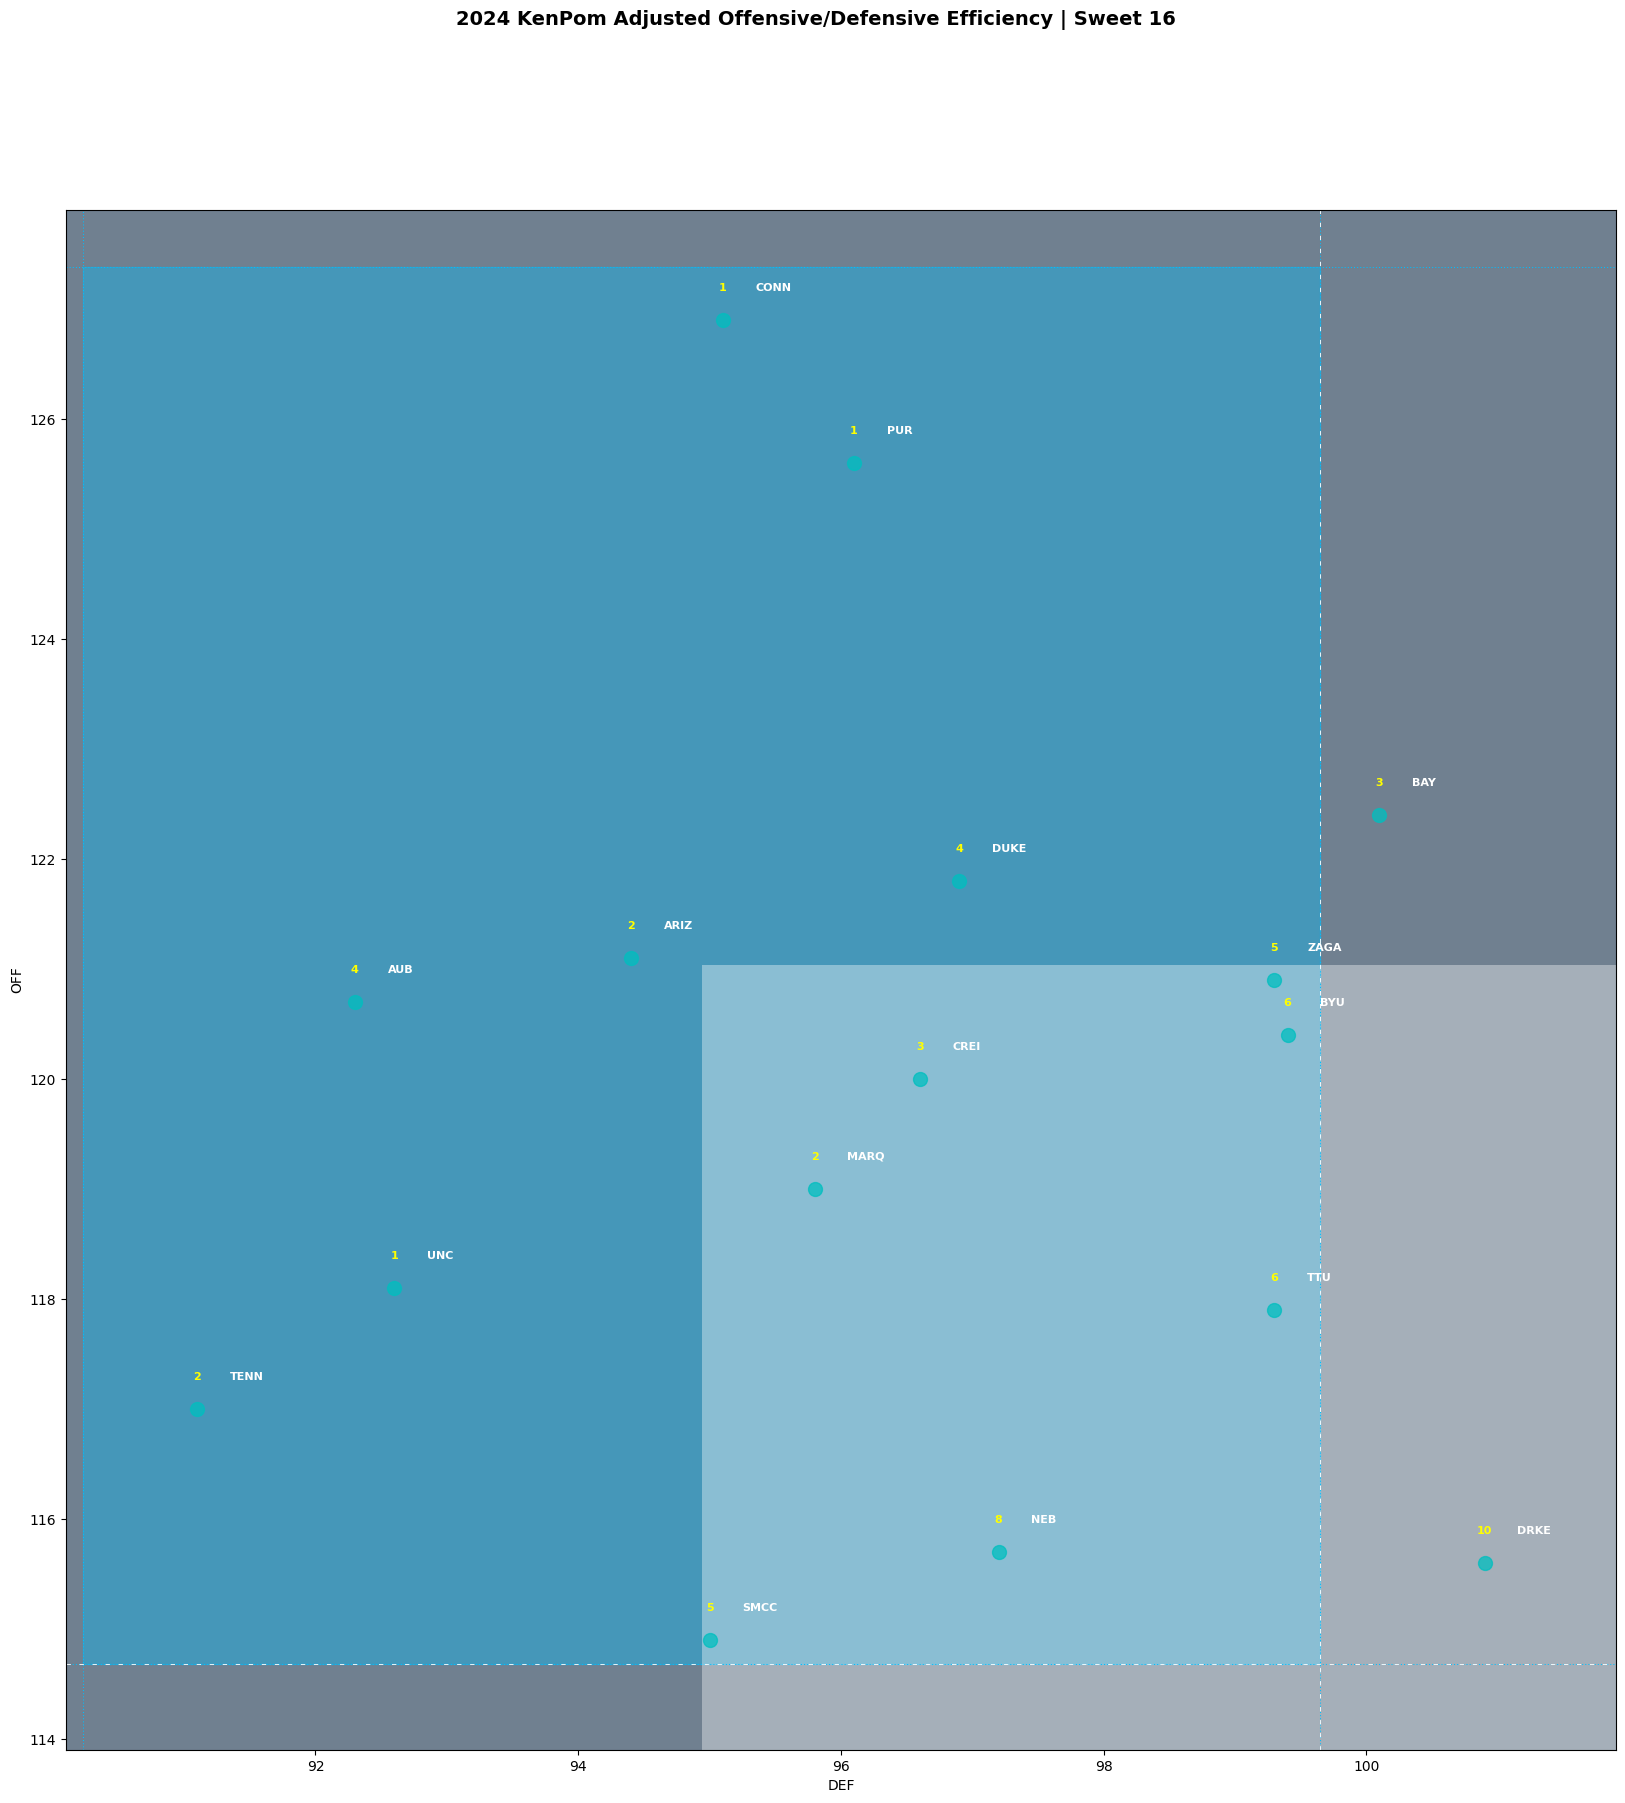

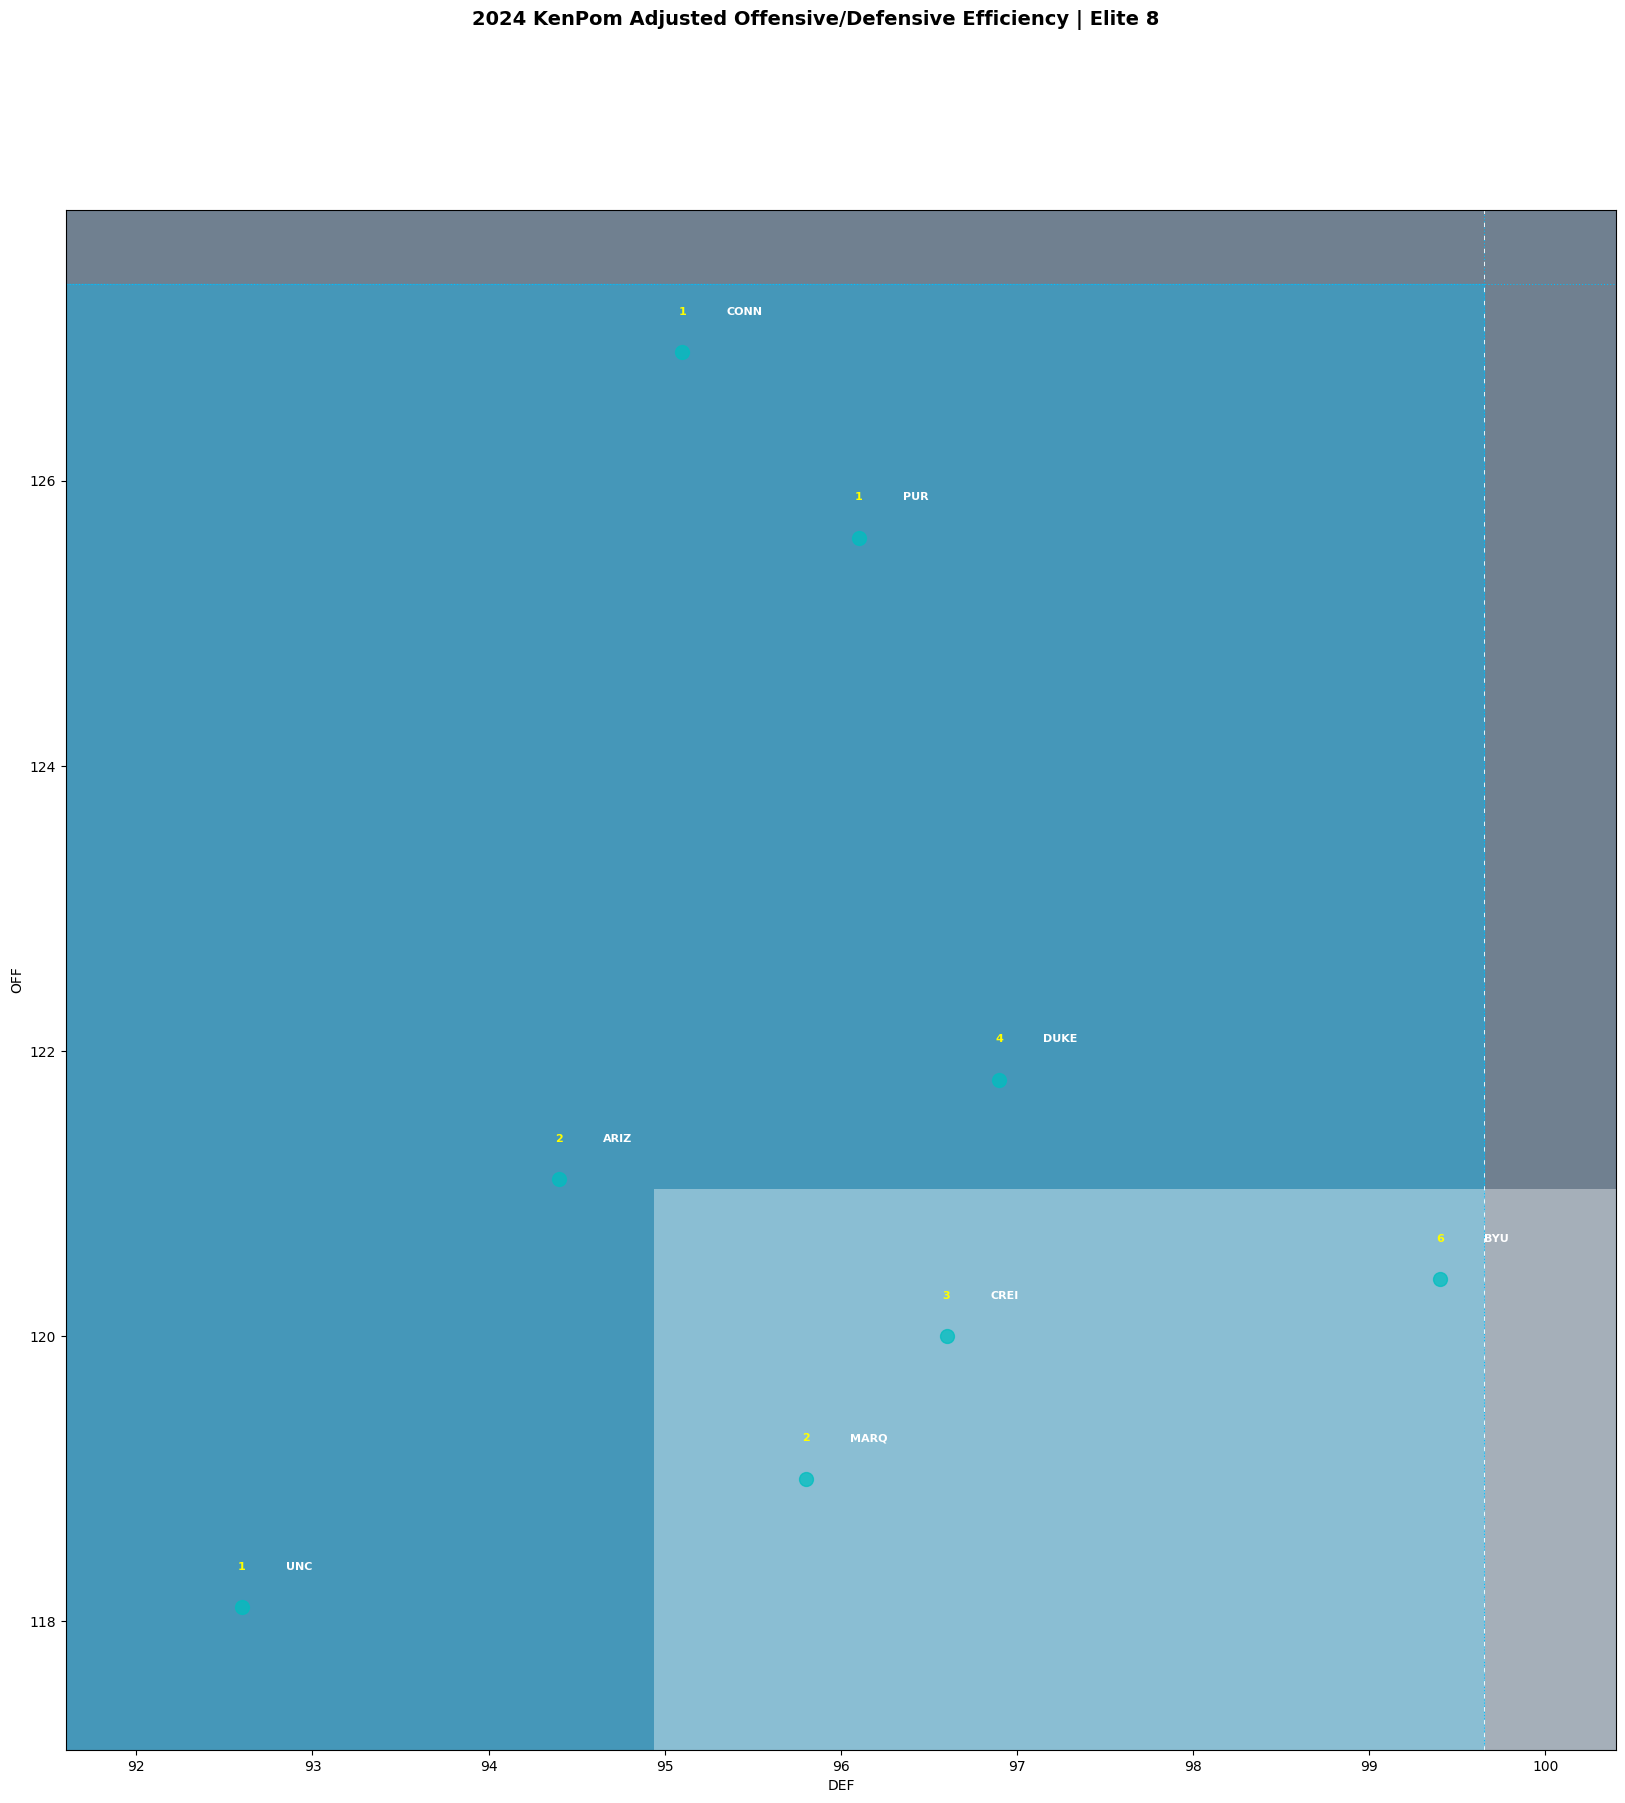

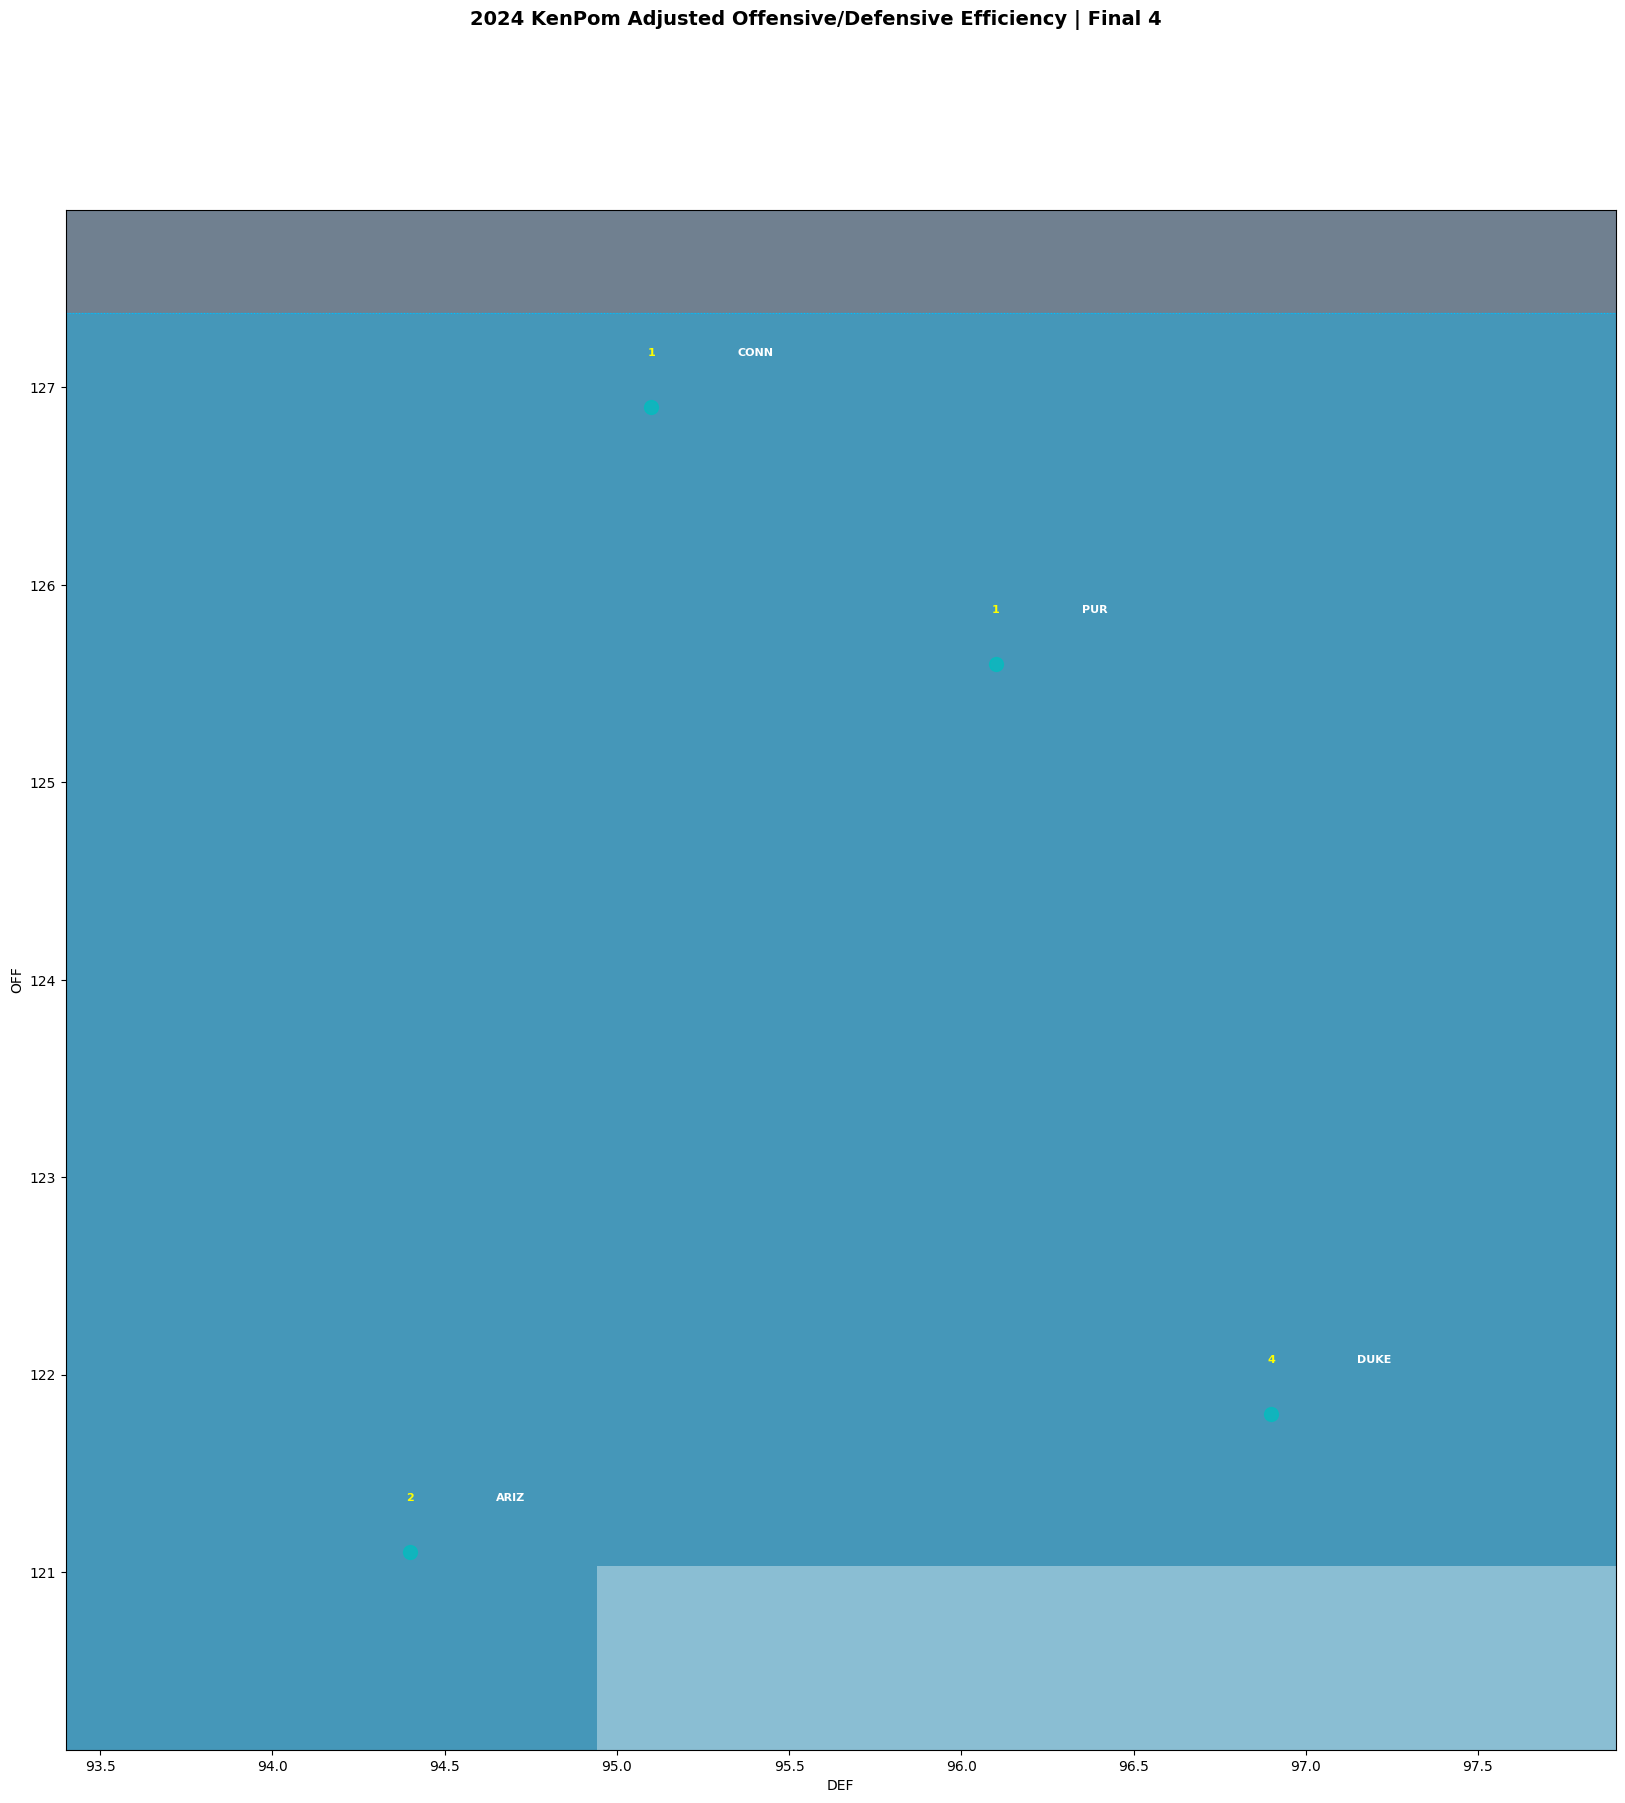

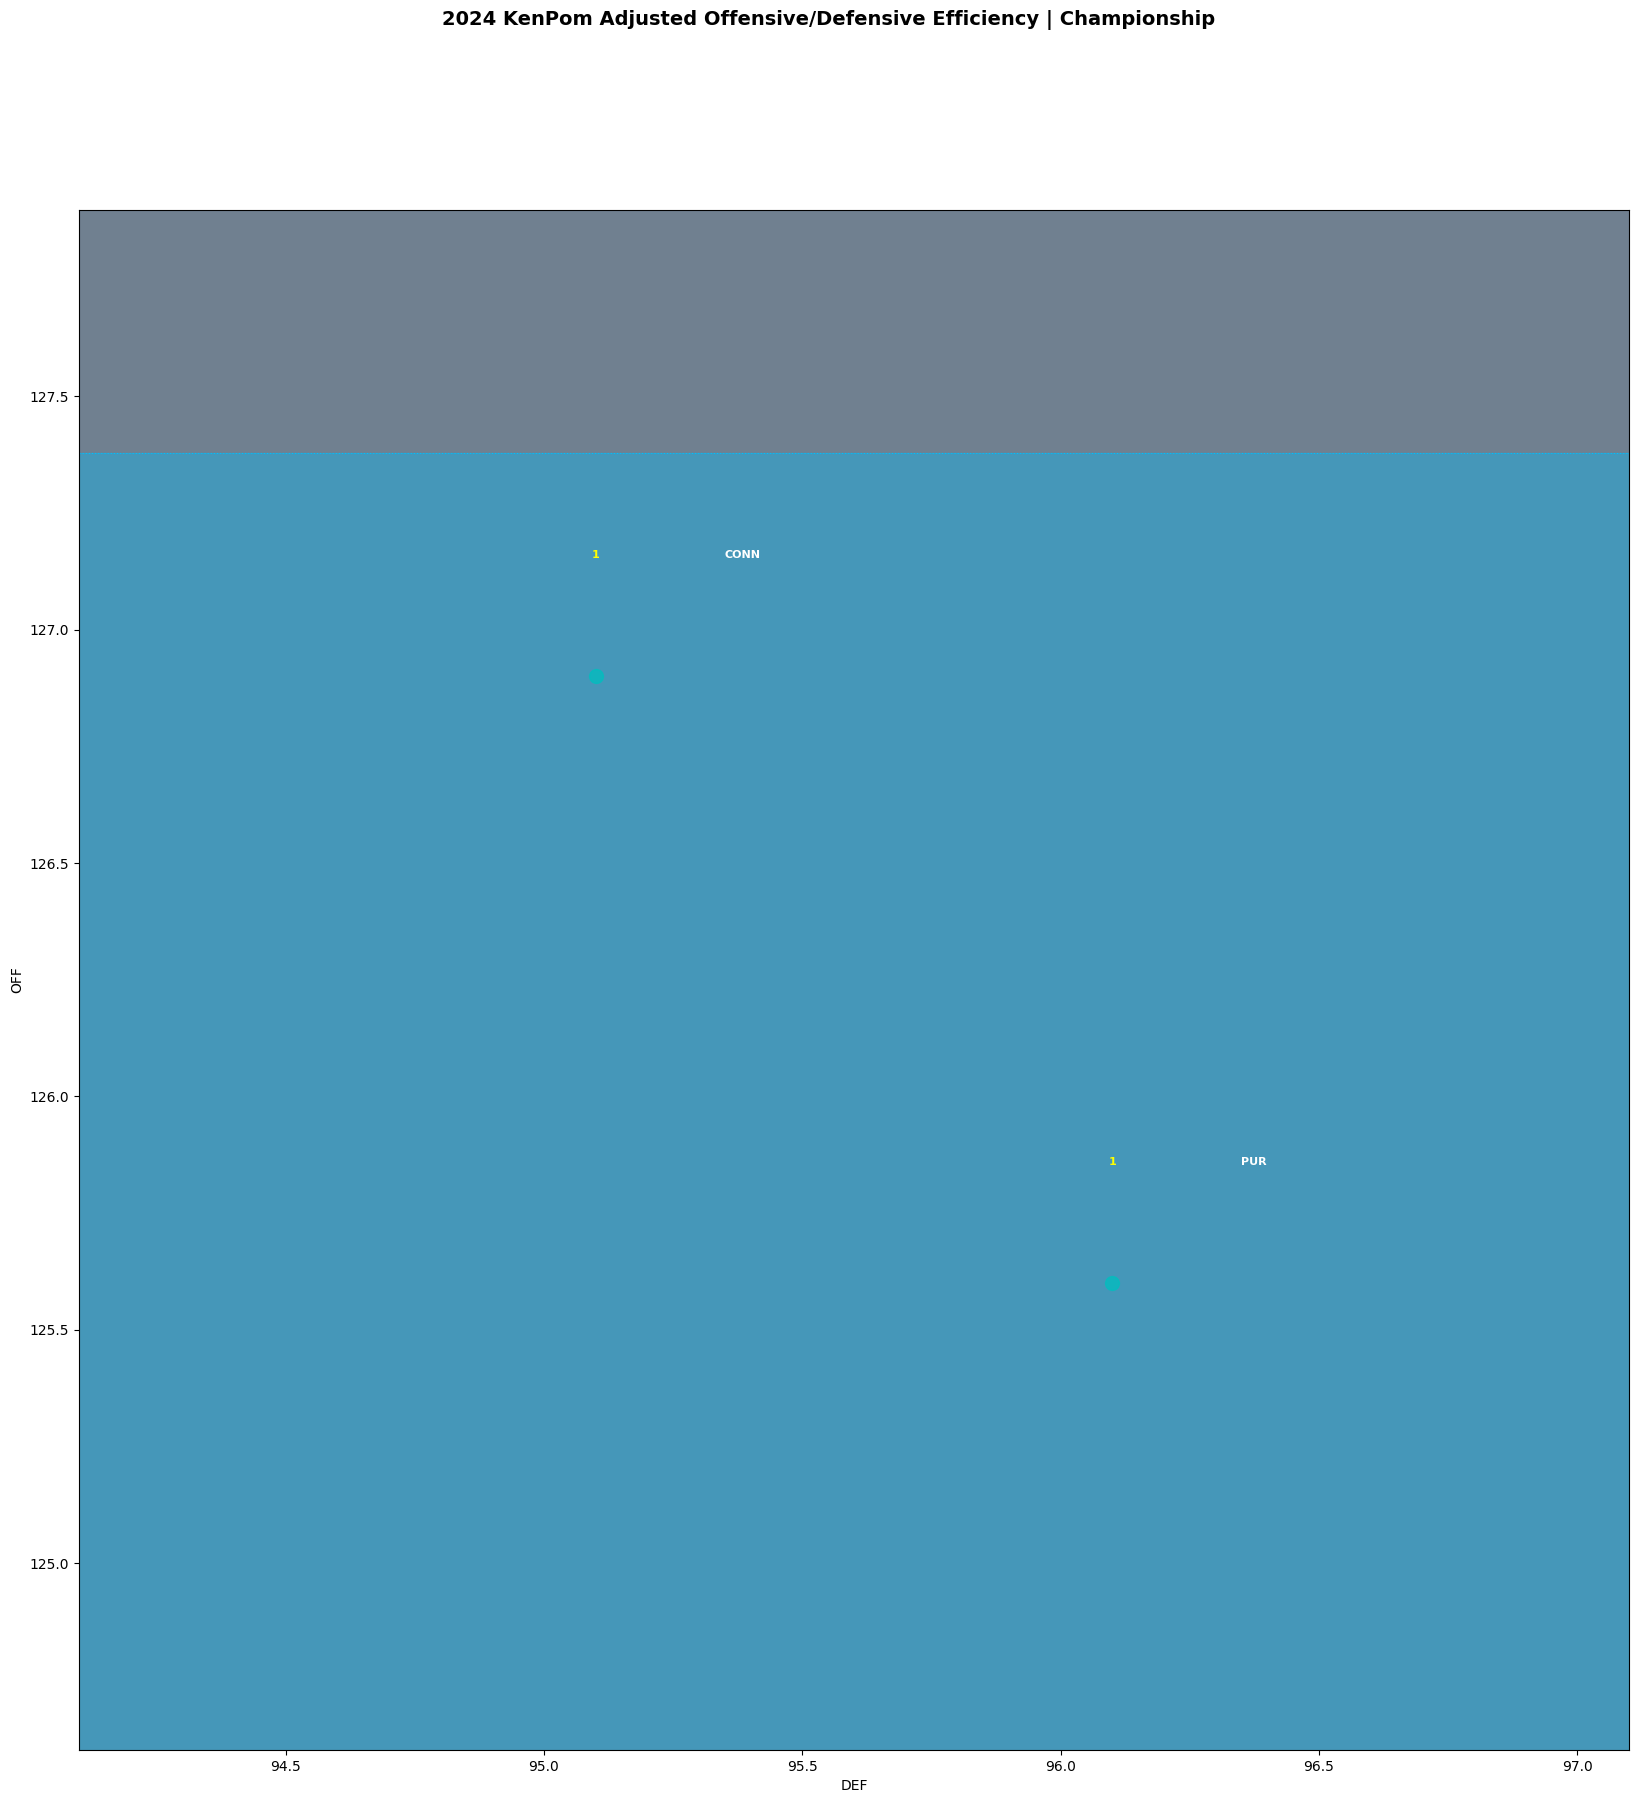

In [32]:
currKpRnd1 = pd.read_csv("../data/TourneyTeams/KenpomStats/trnyKenpom24.csv")

currRegRnd1 = currKpRnd1["hostReg"]

currKpRnd1East = currKpRnd1[currRegRnd1 == "East"]
currKpRnd1West = currKpRnd1[currRegRnd1 == "West"]
currKpRnd1South = currKpRnd1[currRegRnd1 == "South"]
currKpRnd1Midwest = currKpRnd1[currRegRnd1 == "Midwest"]

currKpRnd1Data = [
    {"rnd": 1, "ax": (0, 0), "df": currKpRnd1East, "title": "East", "ptLabels": True},
    {"rnd": 1, "ax": (0, 1), "df": currKpRnd1West, "title": "West", "ptLabels": True},
    {"rnd": 1, "ax": (1, 0), "df": currKpRnd1South, "title": "South", "ptLabels": True},
    {"rnd": 1, "ax": (1, 1), "df": currKpRnd1Midwest, "title": "Midwest", "ptLabels": True},
]

currKpRnd2East = currKpRnd1East.query("teamAbv in ['CONN', 'ISU', 'ILL', 'AUB', 'SDSU', 'BYU', 'DRKE', 'NW']")
currKpRnd2West = currKpRnd1West.query("teamAbv in ['UNC', 'ARIZ', 'BAY', 'BAMA', 'SMCC', 'CLEM', 'NEV', 'MSU']")
currKpRnd2South = currKpRnd1South.query("teamAbv in ['HOU', 'MARQ', 'UK', 'DUKE', 'WIS', 'TTU', 'COLO', 'NEB']")
currKpRnd2Midwest = currKpRnd1Midwest.query("teamAbv in ['PUR', 'TENN', 'CREI', 'KU', 'ZAGA', 'SCAR', 'TEX', 'USU']")

currKpRnd2Data = [
    {"rnd": 2, "ax": (0, 0), "df": currKpRnd2East, "title": "East", "ptLabels": True},
    {"rnd": 2, "ax": (0, 1), "df": currKpRnd2West, "title": "West", "ptLabels": True},
    {"rnd": 2, "ax": (1, 0), "df": currKpRnd2South, "title": "South", "ptLabels": True},
    {"rnd": 2, "ax": (1, 1), "df": currKpRnd2Midwest, "title": "Midwest", "ptLabels": True},
]

currKpRnd3 = currKpRnd1.query("teamAbv in ['CONN', 'AUB', 'BYU', 'DRKE', 'UNC', 'ARIZ', 'BAY', 'SMCC', 'MARQ', 'DUKE', 'TTU', 'NEB', 'PUR', 'TENN', 'CREI', 'ZAGA']")
currKpRnd4 = currKpRnd1.query("teamAbv in ['CONN', 'BYU', 'UNC', 'ARIZ', 'MARQ', 'DUKE', 'PUR', 'CREI']")
currKpRnd5 = currKpRnd1.query("teamAbv in ['CONN', 'ARIZ', 'DUKE', 'PUR']")
currKpRnd6 = currKpRnd1.query("teamAbv in ['CONN', 'PUR']")

currKpRnd1Plot = renderMulti(baseDf=currKpRnd1, dataDict=currKpRnd1Data, cols=2, rows=2, figTitle="2024 KenPom Adjusted Offensive/Defensive Efficiency | Rnd of 64\n")
currKpRnd2Plot = renderMulti(baseDf=currKpRnd1, dataDict=currKpRnd2Data, cols=2, rows=2, figTitle="2024 KenPom Adjusted Offensive/Defensive Efficiency | Rnd of 32\n")
currKpRnd3Plot = renderSingle(baseDf=currKpRnd1, rndDf=currKpRnd3, rnd=3, figTitle="2024 KenPom Adjusted Offensive/Defensive Efficiency", rndTitle="Sweet 16", ptLabels=True)
currKpRnd4Plot = renderSingle(baseDf=currKpRnd1, rndDf=currKpRnd4, rnd=4, figTitle="2024 KenPom Adjusted Offensive/Defensive Efficiency", rndTitle="Elite 8", ptLabels=True)
currKpRnd5Plot = renderSingle(baseDf=currKpRnd1, rndDf=currKpRnd5, rnd=5, figTitle="2024 KenPom Adjusted Offensive/Defensive Efficiency", rndTitle="Final 4", ptLabels=True)
currKpRnd6Plot = renderSingle(baseDf=currKpRnd1, rndDf=currKpRnd6, rnd=6, figTitle="2024 KenPom Adjusted Offensive/Defensive Efficiency", rndTitle="Championship", ptLabels=True)